<a href="https://colab.research.google.com/github/ArtyomShabunin/RNNModels/blob/main/test_attention_model_on_2year_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тестироване модели с вниманием

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from platform import python_version
python_version()

'3.11.11'

In [2]:
!pip install mlflow dagshub --quiet
!pip install pytorch-lightning

import mlflow
import dagshub
import pandas as pd
import numpy as np
import json
import torch

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.0)

import pytorch_lightning as pl

from sklearn.preprocessing import MinMaxScaler
import joblib

import glob
from tqdm import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.2/258.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8

In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cpu')

## Загрузка моделей

In [4]:
dagshub.init("seq2seq-gtd-6rm", "pranamodeling", mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=ad6155a0-10dd-4450-99ea-54af2c57b86b&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=a88e61f9e8d7f73dadfd70fd5b08a676ea852185d69b7740c9dd3f006156b6a1




Accessing as pranamodeling

Initialized MLflow to track repo "pranamodeling/seq2seq-gtd-6rm"

Repository pranamodeling/seq2seq-gtd-6rm initialized!

In [5]:
# Лучшая модель с вниманием

logged_model = 'runs:/6b0692a902e04780b433b74cd2056ce8/mdllol'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)
seq2seq_att_1 = loaded_model.get_raw_model()

2025/01/20 08:20:06 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - accelerate (current: 1.2.1, required: accelerate==1.1.1)
 - boto3 (current: 1.36.2, required: boto3==1.35.82)
 - google-cloud-aiplatform (current: 1.74.0, required: google-cloud-aiplatform==1.73.0)
 - google-cloud-bigquery-connection (current: 1.17.0, required: google-cloud-bigquery-connection==1.16.1)
 - google-cloud-datastore (current: 2.20.2, required: google-cloud-datastore==2.20.1)
 - google-cloud-functions (current: 1.19.0, required: google-cloud-functions==1.18.1)
 - google-cloud-iam (current: 2.17.0, required: google-cloud-iam==2.16.1)
 - google-cloud-language (current: 2.16.0, required: google-cloud-language==2.15.1)
 - google-cloud-translate (current: 3.19.0, required: google-cloud-translate==3.17.0)
 - google-genai (current: 0.3.0, required: google-genai==0.1.0)
 - pytorch-lightning (current: 2.5.0.post0, require

In [6]:
# Модель с encoder_shufle = 0.2

logged_model = 'runs:/ae363c5c089849afb436fbf4eb95f3a4/mdllol'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)
seq2seq_att_2 = loaded_model.get_raw_model()

2025/01/20 08:20:17 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - boto3 (current: 1.36.2, required: boto3==1.36.1)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


In [8]:
# !update-alternatives --list python3
# !sudo update-alternatives --config python3

Входные параметры моделей

In [7]:
input_data = [
    # 'DBinPU.Aldi', # УП дозатора топлива, град
    'DBinPU.P', # активная мощность генератора, МВт
    'DBinPU.Ptgpd', # давление топливного газа перед дозатором, МПа
    'DBinPU.Ttgvh', # температура топливного газа перед дозатороом, С
    # 'DBinPU.nst', # частота вращения ротора силовой турбины, об/мин
    'DBinPU.Ies', # выходной ток в цепи электростартера, А
    'DBinPU.Tn', # температура наружного воздуха, С
    'DBinPU.Bo', # барометрическое давление, кПа
    'DBinPU.fi', # относительная влажность наружного воздуха, %
    'DBinPU.Alzzo', # положение ЗЗО, %
]

Выходные параметры

In [8]:
output_data = [
    # 'DBinPU.P', # активная мощность генератора, МВт
    'DBinPU.Aldi', # УП дозатора топлива, град
    'DBinPU.ntk', # частота вращения ротора турбокомпрессора, об/мин
    'DBinPU.nst', # частота вращения ротора силовой турбины, об/мин
    # 'DBinPU.Ies', # выходной ток в цепи электростартера, А
    'DBinPU.Alvna', # положение ВНА, град
    'DBinPU.Qtg', # расход топливного газа, м3/час
    'DBinPU.Pk', # давление за компрессором, МПа
    'DBinPU.Tvh1', # температура воздуха перед ГТД, С
    'DBinPU.Pvh', # давление воздуха перед ГТД, кПа
    'DBinPU.Tk', # температура воздуха за компрессором, С
    'DBinPU.Tt', # температура газов за силовой турбиной, С
    'DBinPU.Pvyhlg', # давление газов за силовой турбиной, кПа
]

Дополнительные словари

In [9]:
kks_units = {
    'DBinPU.Aldi': "$^\circ$",
    'DBinPU.Ptgpd': "МПа",
    'DBinPU.Ttgvh': "$^\circ$C",
    'DBinPU.Ies': "А",
    'DBinPU.Tn': "$^\circ$C",
    'DBinPU.Bo': "кПа",
    'DBinPU.fi': "%",
    'DBinPU.Alzzo': "%",
    'DBinPU.P': "кВт",
    'DBinPU.ntk': "об/мин",
    'DBinPU.nst': "об/мин",
    'DBinPU.Alvna': "$^\circ$",
    'DBinPU.Qtg': "м3/час",
    'DBinPU.Pk': "МПа",
    'DBinPU.Tvh1': "$^\circ$C",
    'DBinPU.Pvh': "кПа",
    'DBinPU.Tk': "$^\circ$C",
    'DBinPU.Tt': "$^\circ$C",
    'DBinPU.Pvyhlg': "кПа"
}

kks_dict = {
    'DBinPU.Aldi': "УП дозатора топлива",
    'DBinPU.Ptgpd': "Давление топливного газа перед дозатором",
    'DBinPU.Ttgvh': "Температура топливного газа перед дозатороом",
    'DBinPU.Ies': "Выходной ток в цепи электростартера",
    'DBinPU.Tn': "Температура наружного воздуха",
    'DBinPU.Bo': "Барометрическое давление",
    'DBinPU.fi': "Относительная влажность наружного воздуха",
    'DBinPU.Alzzo': "Положение ЗЗО",
    'DBinPU.P': "Активная мощность генератора",
    'DBinPU.ntk': "Частота вращения ротора турбокомпрессора",
    'DBinPU.nst': "Частота вращения ротора силовой турбины",
    'DBinPU.Alvna': "Положение ВНА",
    'DBinPU.Qtg': "Расход топливного газа",
    'DBinPU.Pk': "Давление за компрессором",
    'DBinPU.Tvh1': "Температура воздуха перед ГТД",
    'DBinPU.Pvh': "Давление воздуха перед ГТД",
    'DBinPU.Tk': "Температура воздуха за компрессором",
    'DBinPU.Tt': "Температура газов за силовой турбиной",
    'DBinPU.Pvyhlg': "Давление газов за силовой турбиной"
}

Scalers

In [10]:
scaler_input = joblib.load("/content/drive/MyDrive/RNN-models/scaler_input_2.pkl")
scaler_output = joblib.load("/content/drive/MyDrive/RNN-models/scaler_output_2.pkl")

scaler_input.feature_names_in_ = list(map(lambda name: name[5:], scaler_input.feature_names_in_))
scaler_output.feature_names_in_ = list(map(lambda name: name[5:], scaler_output.feature_names_in_))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Загрузка данных

In [11]:
parquetFileList = glob.glob(f'/content/drive/MyDrive/RNN-models-data/test_data_2/*.gzip')

bad_files = []
for data in tqdm(parquetFileList):
    df = pd.read_parquet(data)
    if (df['GTA1.DBinPU.nst'].mean() < 2998) or (df.shape[0] < 60):
        bad_files.append(data)

100%|██████████| 110/110 [00:07<00:00, 15.21it/s]


In [12]:
parquetFileList = list(set(parquetFileList) - set(bad_files))
parquetFileList.sort()

In [13]:
len(parquetFileList)

98

## Тестирование

Функция для обработки одного файлы

In [14]:
ENCODER_LENGTH = 60
HORIZON = 120
STEP = HORIZON

def predict_by_file(f, model, ENCODER_LENGTH, HORIZON, STEP,  drop_low_rpm=False):

    df = pd.read_parquet(f).ffill()
    df.columns = list(map(lambda col: col[5:], df.columns))

    if drop_low_rpm:
      df = df[df['DBinPU.P'] > 100]

    if df.shape[0] < ENCODER_LENGTH:
      return None, None

    input_values = df[input_data]
    output_values = df[output_data]


    input_scaled = scaler_input.transform(input_values)
    output_scaled = scaler_output.transform(output_values)

    input_scaled = torch.tensor(input_scaled, dtype=torch.float32)
    output_scaled = torch.tensor(output_scaled, dtype=torch.float32)

    results = []
    targets = []

    encoder_inputs_list = []
    decoder_inputs_list = []

    first_step_list = []

    predict_indexes = []

    for i in range(10000):
        start_encoder_seq = i*STEP
        end_encoder_seq = start_encoder_seq + ENCODER_LENGTH

        start_decoder_seq = end_encoder_seq
        end_decoder_seq = start_decoder_seq+HORIZON

        start_predict_seq = start_decoder_seq+1
        end_predict_seq = end_decoder_seq+1



        if end_encoder_seq > output_scaled.shape[0]: break

        if start_decoder_seq >= output_scaled.shape[0]: break

        if end_predict_seq > output_scaled.shape[0]:
          end_predict_seq = output_scaled.shape[0]
          end_decoder_seq = end_predict_seq - 1

        start_target_seq = start_predict_seq
        end_targed_seq = end_predict_seq

        encoder_inputs = torch.cat((
            input_scaled[start_encoder_seq:end_encoder_seq, :], output_scaled[start_encoder_seq:end_encoder_seq, :]), 1)
        decoder_inputs = input_scaled[start_decoder_seq:end_decoder_seq, :]

        encoder_inputs_list.append(encoder_inputs)
        decoder_inputs_list.append(decoder_inputs)

        first_step_list.append(output_scaled[start_decoder_seq][None,:])

        target_scaled = output_scaled[start_target_seq:end_targed_seq, :]
        target = scaler_output.inverse_transform(target_scaled)
        targets.append(target_scaled)

        if i == 0:
          predict_indexes.append(list(range(start_predict_seq, end_predict_seq)))
        else:
          predict_indexes.append(list(range(start_predict_seq, start_predict_seq+HORIZON)))

    for idx, decoder_inputs in enumerate(decoder_inputs_list):
      true_len = decoder_inputs_list[0].shape[0]
      decoder_inputs_len = decoder_inputs.shape[0]
      if decoder_inputs_len < true_len:
        decoder_inputs_list[idx] = torch.cat([decoder_inputs, torch.tile(decoder_inputs[-1,:], (true_len - decoder_inputs_len, 1))])

    # return torch.tensor(np.array(encoder_inputs_list)), torch.tensor(np.array(decoder_inputs_list)), torch.tensor(np.array(first_step_list))

    model.eval()

    with torch.no_grad():
      r, hs = model(
          torch.tensor(np.array(encoder_inputs_list)).to(device),
          torch.tensor(np.array(decoder_inputs_list)).to(device),
          torch.tensor(np.array(first_step_list)).to(device))

    r = r.to("cpu")
    hs = hs.to("cpu")


    if len(r.shape) < 3: r = r[None,:,:]

    loss = torch.nn.MSELoss(reduction='none')

    for idx, target in enumerate(targets):
      true_len = targets[0].shape[0]
      target_len = target.shape[0]
      if target_len < true_len:
        targets[idx] = torch.cat([target, torch.tile(target[-1,:], (true_len - target_len, 1))])

    targets = np.array(targets)

    loss = torch.mean(loss(r, torch.tensor(targets)), (1,))

    # return predict_indexes, r, targets

    data = np.concatenate((np.array(predict_indexes)[:,:,None], r, targets), axis=2)
    data = data.reshape(-1, data.shape[-1])
    df = pd.DataFrame(data, columns=['index', *[s+'_predict' for s in output_data], *[s+'_target' for s in output_data]])
    return df, loss

## Эксперименты

In [16]:
# df, loss = predict_by_file(parquetFileList[0], seq2seq_att, 60, 50000, 50000, drop_low_rpm=False)
# df[list(map(lambda s: s + "_predict", output_data))] = scaler_output.inverse_transform(df[list(map(lambda s: s + "_predict", output_data))].values)
# df[list(map(lambda s: s + "_target", output_data))] = scaler_output.inverse_transform(df[list(map(lambda s: s + "_target", output_data))].values)

In [17]:
# df.columns

In [18]:
# fig = plt.figure(figsize=(10,4))
# df['DBinPU.Aldi_predict'].plot(label="расчет");
# df['DBinPU.Aldi_target'].plot(label="архив");
# plt.legend();
# plt.ylabel(kks_units['DBinPU.Aldi']);
# plt.title(kks_dict['DBinPU.Aldi']);
# plt.show();
# # fig.savefig('fig1_seq2seq.png', dpi=100, bbox_inches='tight');

# fig = plt.figure(figsize=(10,4))
# df['DBinPU.Tt_predict'].plot(label="расчет");
# df['DBinPU.Tt_target'].plot(label="архив");
# plt.legend();
# plt.ylabel(kks_units['DBinPU.Tt']);
# plt.title(kks_dict['DBinPU.Tt']);
# plt.show();
# # fig.savefig('fig2_seq2seq.png', dpi=100, bbox_inches='tight');

# fig = plt.figure(figsize=(10,4))
# df['DBinPU.Alvna_predict'].plot(label="расчет");
# df['DBinPU.Alvna_target'].plot(label="архив");
# plt.legend();
# plt.ylabel(kks_units['DBinPU.Alvna']);
# plt.title(kks_dict['DBinPU.Alvna']);
# plt.show();
# # fig.savefig('fig2_att.png', dpi=100, bbox_inches='tight');

# fig = plt.figure(figsize=(10,4))
# df['DBinPU.Qtg_predict'].plot(label="расчет");
# df['DBinPU.Qtg_target'].plot(label="архив");
# plt.legend();
# plt.ylabel(kks_units['DBinPU.Qtg']);
# plt.title(kks_dict['DBinPU.Qtg']);
# plt.show();

In [19]:
# df, loss = predict_by_file(parquetFileList[2], seq2seq_att, 60, 50000, 50000, drop_low_rpm=False)
# df[list(map(lambda s: s + "_predict", output_data))] = scaler_output.inverse_transform(df[list(map(lambda s: s + "_predict", output_data))].values)
# df[list(map(lambda s: s + "_target", output_data))] = scaler_output.inverse_transform(df[list(map(lambda s: s + "_target", output_data))].values)

In [20]:
# df.columns

In [21]:
# fig = plt.figure(figsize=(10,4))
# df['DBinPU.Aldi_predict'].plot(label="расчет");
# df['DBinPU.Aldi_target'].plot(label="архив");
# plt.legend();
# plt.ylabel(kks_units['DBinPU.Aldi']);
# plt.title(kks_dict['DBinPU.Aldi']);
# plt.show();
# # fig.savefig('fig1_att.png', dpi=100, bbox_inches='tight');

# fig = plt.figure(figsize=(10,4))
# df['DBinPU.Tt_predict'].plot(label="расчет");
# df['DBinPU.Tt_target'].plot(label="архив");
# plt.legend();
# plt.ylabel(kks_units['DBinPU.Tt']);
# plt.title(kks_dict['DBinPU.Tt']);
# plt.show();
# # fig.savefig('fig2_att.png', dpi=100, bbox_inches='tight');

# fig = plt.figure(figsize=(10,4))
# df['DBinPU.Alvna_predict'].plot(label="расчет");
# df['DBinPU.Alvna_target'].plot(label="архив");
# plt.legend();
# plt.ylabel(kks_units['DBinPU.Alvna']);
# plt.title(kks_dict['DBinPU.Alvna']);
# plt.show();
# # fig.savefig('fig2_att.png', dpi=100, bbox_inches='tight');

# fig = plt.figure(figsize=(10,4))
# df['DBinPU.Qtg_predict'].plot(label="расчет");
# df['DBinPU.Qtg_target'].plot(label="архив");
# plt.legend();
# plt.ylabel(kks_units['DBinPU.Qtg']);
# plt.title(kks_dict['DBinPU.Qtg']);
# plt.show();

Функция для построения графиков

In [15]:
def plot_model_result(file, model, ENCODER_LENGTH=ENCODER_LENGTH, HORIZON=HORIZON, STEP=STEP, drop_low_rpm=False, error=True):


  df, loss = predict_by_file(file, model, ENCODER_LENGTH, HORIZON, STEP, drop_low_rpm)

  params = output_data

  fig, axs = plt.subplots(6, 2, figsize=(20,20))

  axs = np.array(axs)

  for idx, ax in enumerate(axs.reshape(-1)):
    if idx > (len(params) - 1): break
    ax.plot(df['index'], df[params[idx]+"_predict"], label="predict")
    ax.plot(df['index'], df[params[idx]+"_target"], label="target")
    if error: ax.plot(df['index'], abs(df[params[idx]+"_target"] - df[params[idx]+"_predict"]), label="error")
    ax.set_title(params[idx])

    ax.legend()

  plt.show()


In [16]:
plot_model_result(parquetFileList[10], seq2seq_att_1, ENCODER_LENGTH=60, HORIZON=50000, STEP=50000, drop_low_rpm=False)

KeyboardInterrupt: 

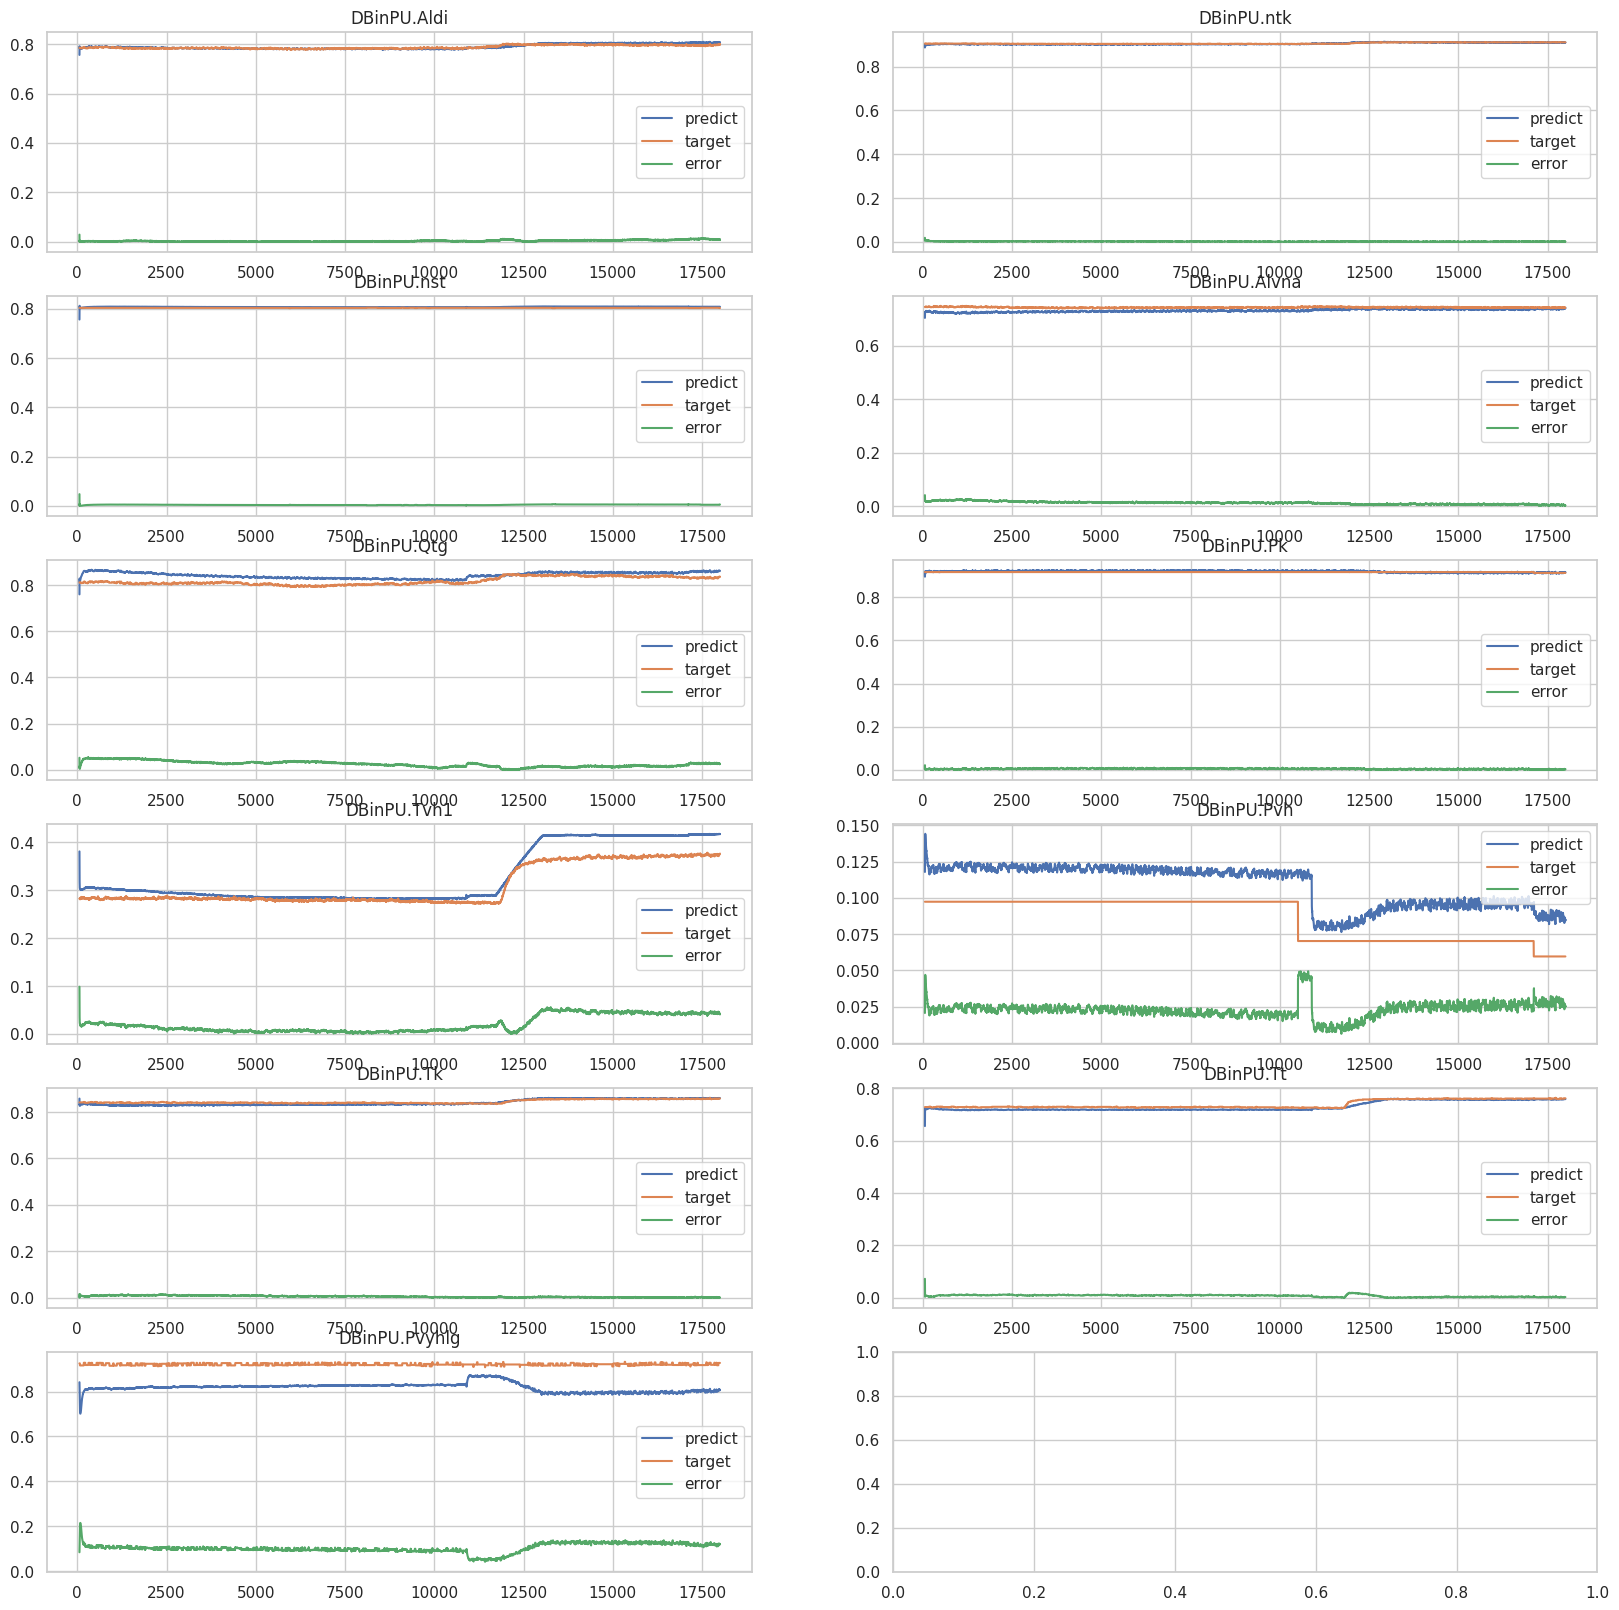

In [24]:
plot_model_result(parquetFileList[10], seq2seq_att_2, ENCODER_LENGTH=60, HORIZON=50000, STEP=50000, drop_low_rpm=False)

In [24]:
# plot_model_result(parquetFileList[10], seq2seq_att, ENCODER_LENGTH=120, HORIZON=4000, STEP=3000, drop_low_rpm=False, error=False)

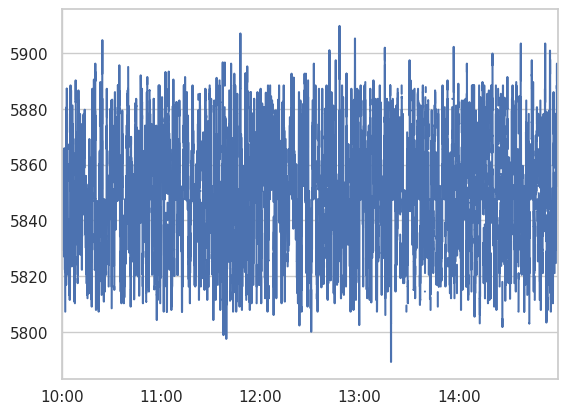

In [25]:
pd.read_parquet(parquetFileList[10])['GTA1.DBinPU.P'].plot();

In [27]:
# start_decoder_seq = 2000
# end_decoder_seq = 8000
# file = parquetFileList[79]

# df = pd.read_parquet(file)
# df.columns = list(map(lambda col: col[5:], df.columns))

# input_values = df[input_data]
# output_values = df[output_data]

# input_scaled = scaler_input.transform(input_values)
# output_scaled = scaler_output.transform(output_values)

# input_scaled = torch.tensor(input_scaled, dtype=torch.float32)
# output_scaled = torch.tensor(output_scaled, dtype=torch.float32)

# decoder_inputs = input_scaled[start_decoder_seq:end_decoder_seq, :]
# decoder_inputs_79 = decoder_inputs[None,:,:]
# decoder_inputs_79_sint = torch.tile(decoder_inputs_79.mean(axis=1), (1,100000,1))

# first_step_79 = output_scaled[start_decoder_seq][None, None,:]

# target = output_scaled[start_decoder_seq+1:end_decoder_seq+1]

In [17]:
start_encoder_seq = 2000
end_encoder_seq = 2060

encoder_inputs_list = []
decoder_inputs_list = []
first_step_list = []

ts = []

decoder_inputs_fin = torch.Tensor(pd.DataFrame({
    "GTA1.DBinPU.P": [5850.0],
    "GTA1.DBinPU.Ptgpd": [1.8],
    "GTA1.DBinPU.Ttgvh": [74],
    "GTA1.DBinPU.Ies": [0.0],
    "GTA1.DBinPU.Tn": [15.0],
    "GTA1.DBinPU.Bo": [101.7],
    "GTA1.DBinPU.fi": [68.34],
    "GTA1.DBinPU.Alzzo": [0.0]
}).values)

decoder_inputs_fin = torch.Tensor(scaler_input.transform(decoder_inputs_fin))

for file in tqdm(parquetFileList):

  df = pd.read_parquet(file).ffill()
  df.columns = list(map(lambda col: col[5:], df.columns))

  ts.append(df.index[start_encoder_seq])

  input_values = df[input_data]
  output_values = df[output_data]

  input_scaled = scaler_input.transform(input_values)
  output_scaled = scaler_output.transform(output_values)

  input_scaled = torch.tensor(input_scaled, dtype=torch.float32)
  output_scaled = torch.tensor(output_scaled, dtype=torch.float32)

  encoder_inputs = torch.cat((
      input_scaled[start_encoder_seq:end_encoder_seq, :],
      output_scaled[start_encoder_seq:end_encoder_seq, :]), 1)
  encoder_inputs = encoder_inputs[:,:]
  encoder_inputs_list.append(encoder_inputs)

  first_step = output_scaled[end_encoder_seq][None, :]
  first_step_list.append(first_step)

  decoder_inputs = torch.Tensor(np.linspace(input_scaled[end_encoder_seq,:], decoder_inputs_fin[0], 30000))
  decoder_inputs = torch.cat([decoder_inputs, torch.tile(decoder_inputs_fin, (10000,1))])
  decoder_inputs_list.append(decoder_inputs)




encoder_inputs = torch.stack(encoder_inputs_list, dim=0)
decoder_inputs = torch.stack(decoder_inputs_list, dim=0)
first_step = torch.stack(first_step_list, dim=0)


# decoder_inputs = torch.tile(decoder_inputs, (encoder_inputs.shape[0],1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
100%|██████████| 98/98 [00:03<00:00, 28.11it/s]


In [18]:
print(decoder_inputs.shape)
print(first_step.shape)
print(decoder_inputs.shape)
print(encoder_inputs.shape)

torch.Size([98, 40000, 8])
torch.Size([98, 1, 11])
torch.Size([98, 40000, 8])
torch.Size([98, 60, 19])


### Тестирование первого варианта модели

In [52]:
seq2seq_att_1.eval()

with torch.no_grad():
  r1, hs1 = seq2seq_att_1(encoder_inputs.to(device),
                      decoder_inputs.to(device),
                      first_step.to(device))

r1 = r1.to("cpu")

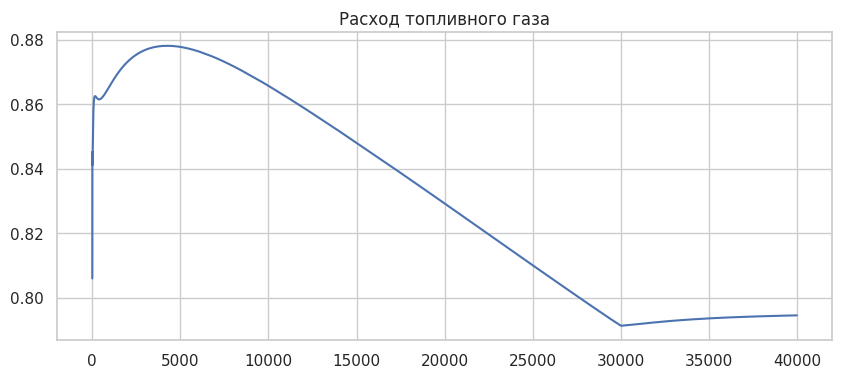

In [53]:
fig = plt.figure(figsize=(10,4))

plt.plot(r1[1,:, output_data.index('DBinPU.Qtg')]);
# plt.plot(r[1,output_data.index('DBinPU.Qtg')], label="init_file - 79");
# plt.legend();
plt.title(kks_dict['DBinPU.Qtg']);

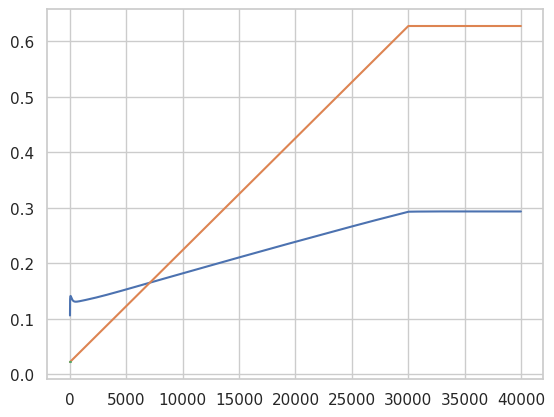

In [55]:
plt.plot(r1[1,:, output_data.index('DBinPU.Tvh1')]);
plt.plot(decoder_inputs[1, :, input_data.index('DBinPU.Tn')]);
plt.plot(encoder_inputs[1, :, input_data.index('DBinPU.Tn')]);

In [56]:
input_data

['DBinPU.P',
 'DBinPU.Ptgpd',
 'DBinPU.Ttgvh',
 'DBinPU.Ies',
 'DBinPU.Tn',
 'DBinPU.Bo',
 'DBinPU.fi',
 'DBinPU.Alzzo']

In [48]:
output_data.index('DBinPU.Qtg') + len(input_data)

12

In [51]:
encoder_inputs.shape

torch.Size([98, 60, 19])

In [25]:
# result_df_1 = pd.DataFrame(r1[:,-1, :], index=ts, columns=output_data)
# result_df_1.to_csv("/content/drive/MyDrive/RNN-models/att_result_df_1.csv")
# result_df_1 = pd.DataFrame(r1[:,-1, :], index=ts, columns=output_data).loc[:'2024-02-28']

result_df_1 = pd.read_csv("/content/drive/MyDrive/RNN-models/att_result_df_1.csv",
                          parse_dates=[0], index_col=0,).loc[:'2024-02-28']

# после 2024-02-28 перестали поступать данные по расходу топлива

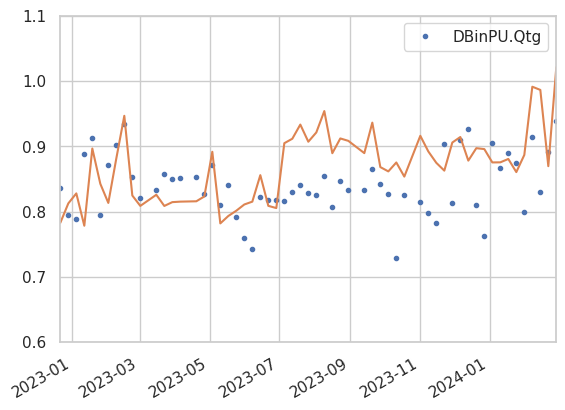

In [62]:
result_df_1['DBinPU.Qtg'].plot(linestyle='', marker='.');
plt.plot(ts, encoder_inputs[:, :, 12].mean(axis=1));
plt.xlim([pd.to_datetime('2022-12-21'), pd.to_datetime('2024-02-28')])
plt.ylim([0.6, 1.1]);
plt.legend();

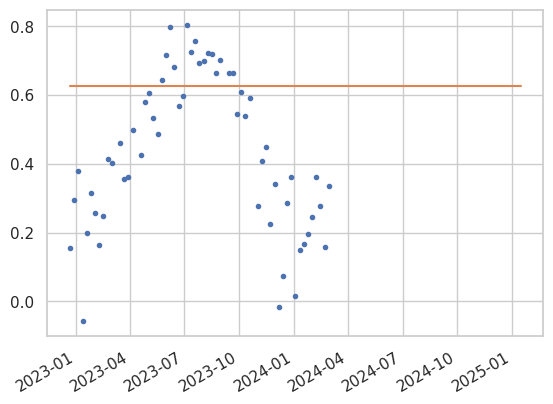

In [35]:
result_df_1['DBinPU.Tvh1'].plot(linestyle='', marker='.');
plt.plot(ts, decoder_inputs[:,-1,input_data.index('DBinPU.Tn')]);

### Тестирование второго варианта модели

In [77]:
seq2seq_att_2.eval()

with torch.no_grad():
  r2, hs2 = seq2seq_att_2(encoder_inputs.to(device),
                      decoder_inputs.to(device),
                      first_step.to(device))

r2 = r2.to("cpu")

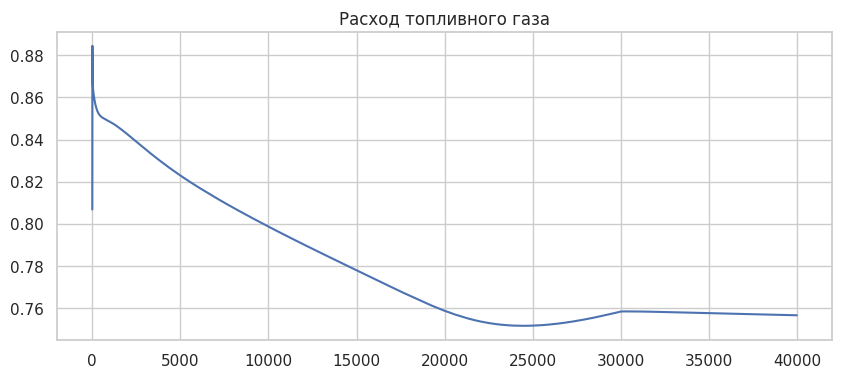

In [78]:
fig = plt.figure(figsize=(10,4))

plt.plot(r2[1,:, output_data.index('DBinPU.Qtg')]);
# plt.plot(r[1,output_data.index('DBinPU.Qtg')], label="init_file - 79");
# plt.legend();
plt.title(kks_dict['DBinPU.Qtg']);

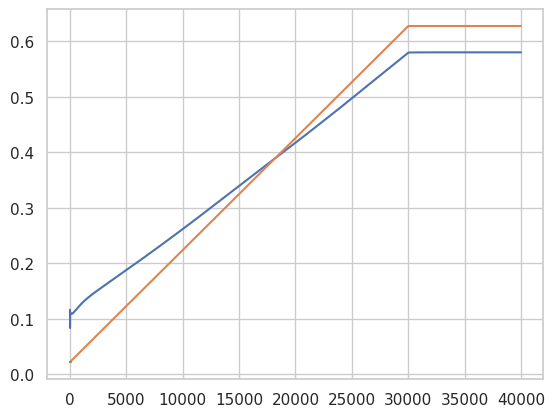

In [79]:
plt.plot(r2[1,:, output_data.index('DBinPU.Tvh1')]);
plt.plot(decoder_inputs[1, :, input_data.index('DBinPU.Tn')]);
plt.plot(encoder_inputs[1, :, input_data.index('DBinPU.Tn')]);

In [36]:
# result_df_2 = pd.DataFrame(r2[:,-1, :], index=ts, columns=output_data)
# result_df_2.to_csv("/content/drive/MyDrive/RNN-models/att_result_df_2.csv")
# result_df_2 = pd.DataFrame(r2[:,-1, :], index=ts, columns=output_data).loc[:'2024-02-28']

result_df_2 = pd.read_csv("/content/drive/MyDrive/RNN-models/att_result_df_2.csv",
                          parse_dates=[0], index_col=0,).loc[:'2024-02-28']

In [79]:
result_df_2.shape

(59, 11)

In [73]:
input_data

['DBinPU.P',
 'DBinPU.Ptgpd',
 'DBinPU.Ttgvh',
 'DBinPU.Ies',
 'DBinPU.Tn',
 'DBinPU.Bo',
 'DBinPU.fi',
 'DBinPU.Alzzo']

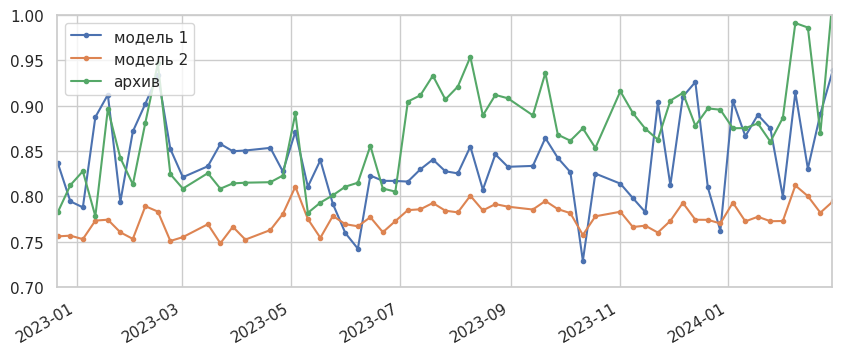

In [81]:
fig = plt.figure(figsize=(10,4))

result_df_1['DBinPU.Qtg'].plot(linestyle='-', marker='.', label="модель 1");
result_df_2['DBinPU.Qtg'].plot(linestyle='-', marker='.', label="модель 2");
plt.plot(ts,
         encoder_inputs[:, :, output_data.index('DBinPU.Qtg') + len(input_data)].mean(axis=1),
         label="архив", marker='.');
plt.xlim([pd.to_datetime('2022-12-21'), pd.to_datetime('2024-02-28')])
plt.ylim([0.7, 1.0]);
plt.legend();

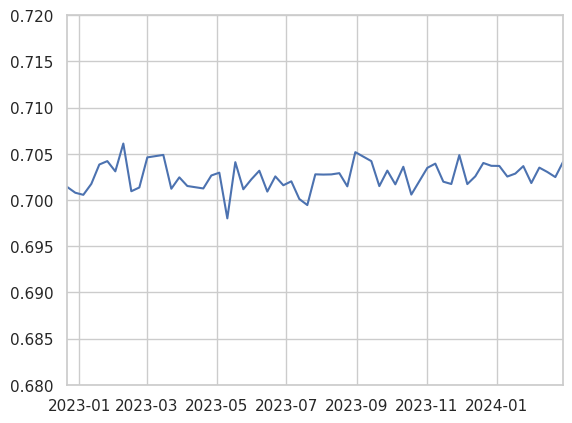

In [77]:
plt.plot(ts, encoder_inputs[:, :, input_data.index('DBinPU.P')].mean(axis=1), label="архив");
plt.xlim([pd.to_datetime('2022-12-21'), pd.to_datetime('2024-02-28')])
plt.ylim([0.68, 0.72]);

(19347.0, 19781.0)

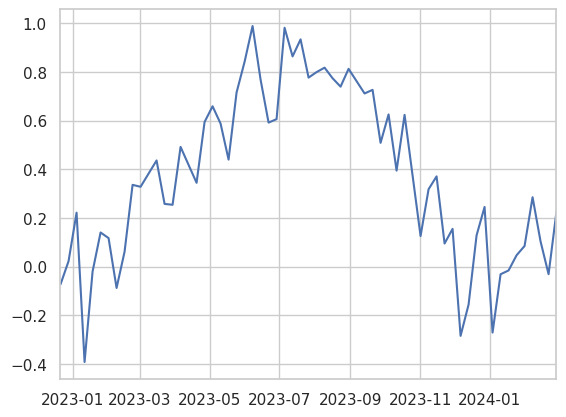

In [78]:
plt.plot(ts, encoder_inputs[:, :, input_data.index('DBinPU.Tn')].mean(axis=1), label="архив");
plt.xlim([pd.to_datetime('2022-12-21'), pd.to_datetime('2024-02-28')])

In [ ]:
result_df_1['DBinPU.Qtg'].plot(linestyle='-', marker='.', label="модель 1");
result_df_2['DBinPU.Qtg'].plot(linestyle='-', marker='.', label="модель 2");
plt.plot(ts, encoder_inputs[:, :, 12].mean(axis=1), label="архив");
plt.xlim([pd.to_datetime('2022-12-21'), pd.to_datetime('2024-02-28')])
plt.ylim([0.7, 1.0]);
plt.legend();

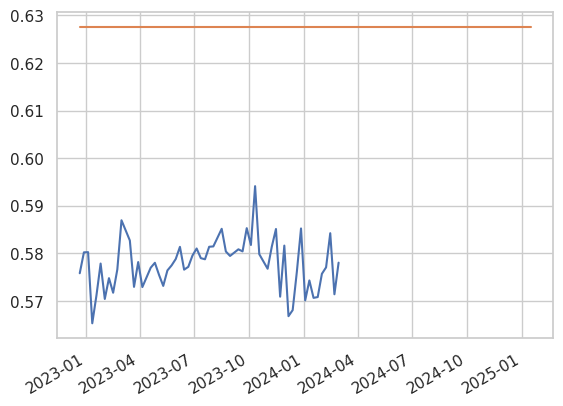

In [39]:
result_df_2['DBinPU.Tvh1'].plot();
plt.plot(ts, decoder_inputs[:,-1,input_data.index('DBinPU.Tn')]);

In [75]:
using_files[82]

'/content/drive/MyDrive/RNN-models-data/test_data_2/gta1_2024_12_25_10_00.gzip'

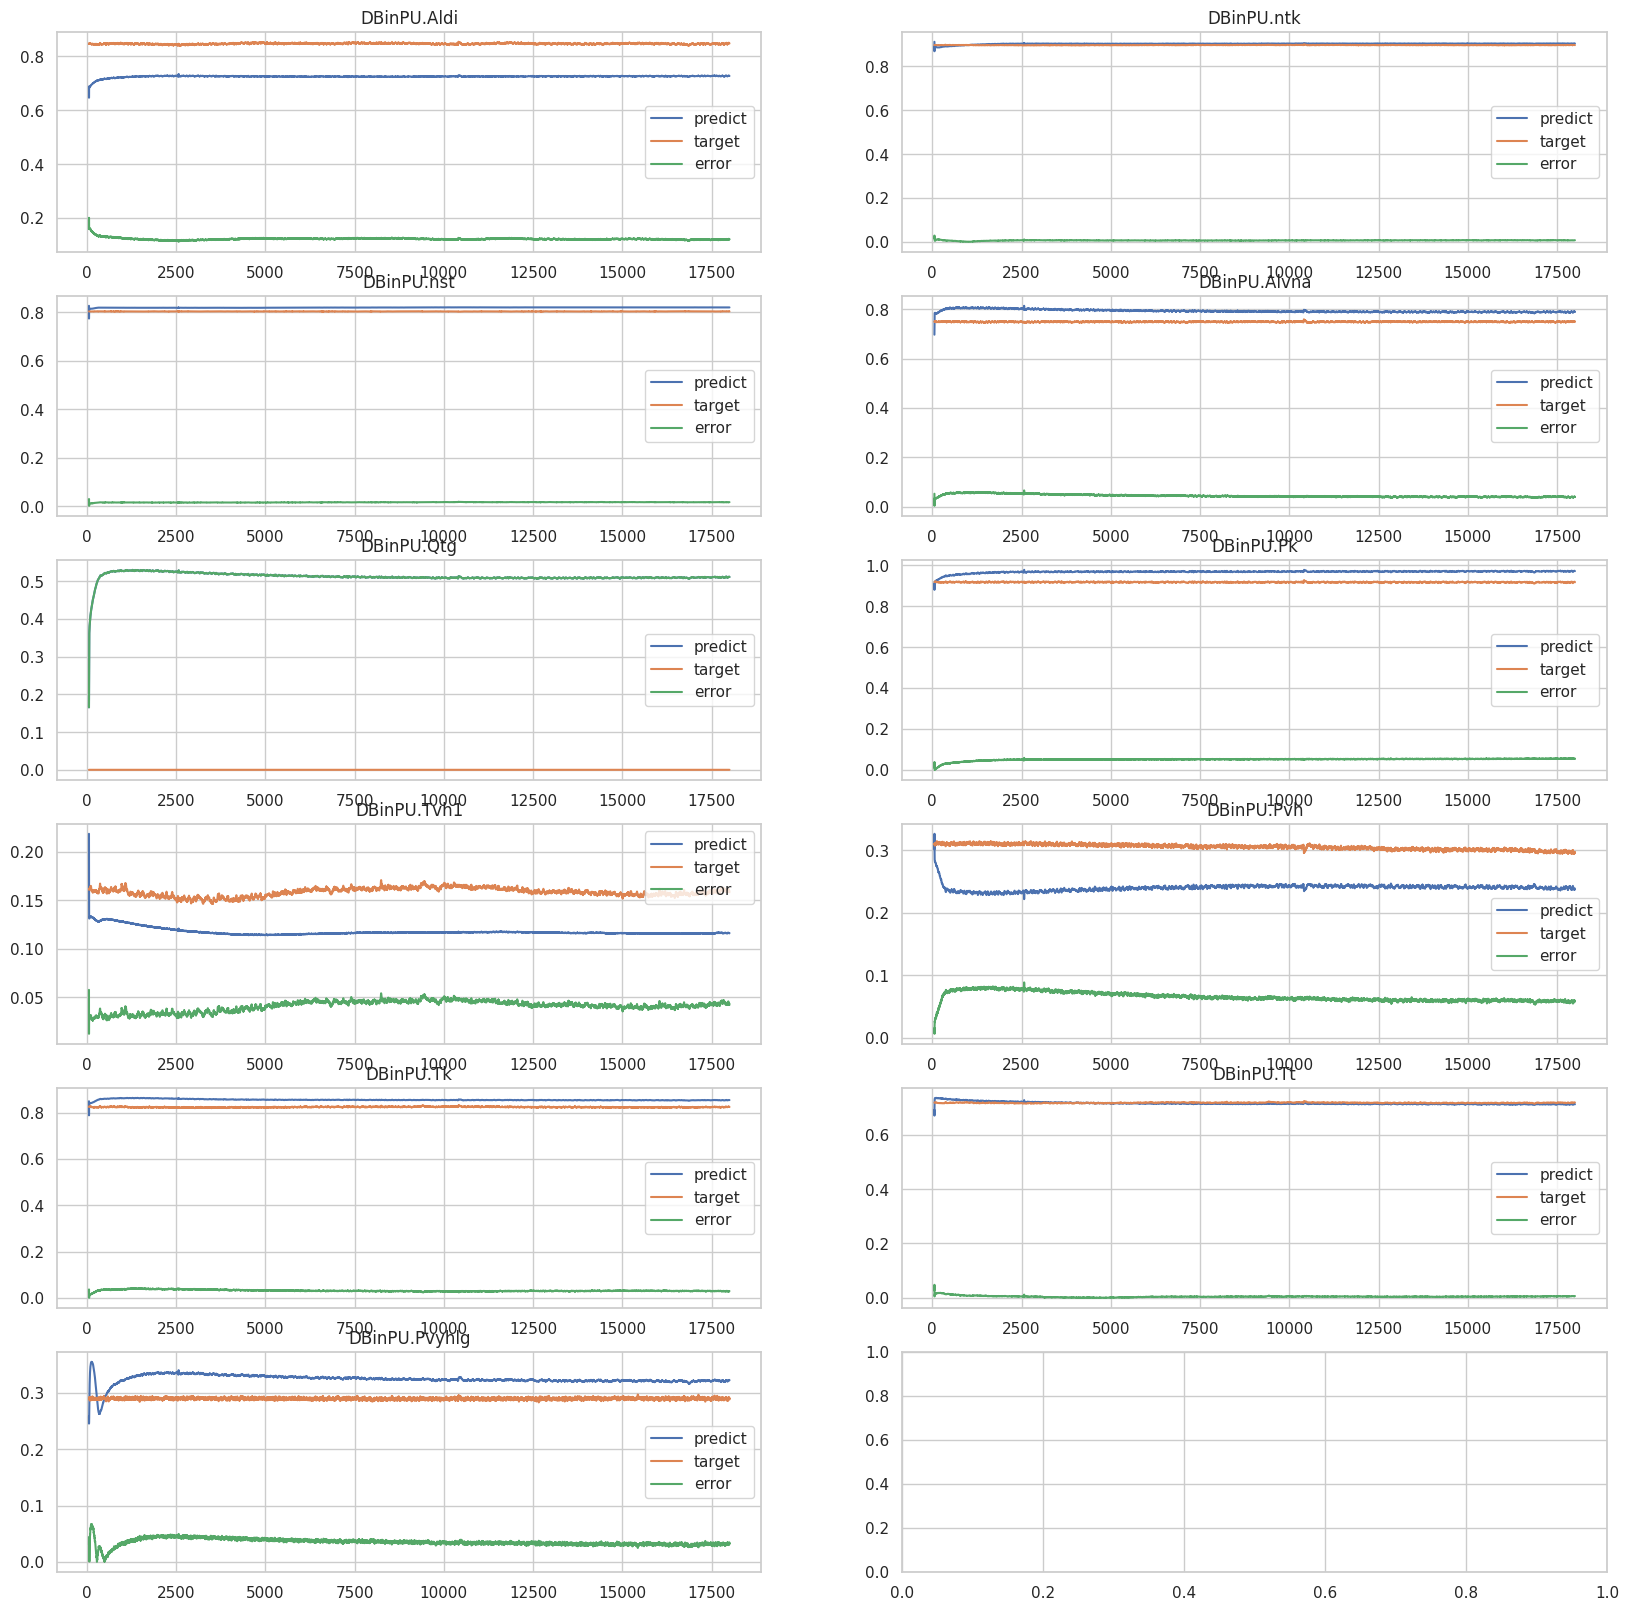

In [72]:
plot_model_result(using_files[30], seq2seq_att, ENCODER_LENGTH=60, HORIZON=50000, STEP=50000, drop_low_rpm=False)

In [41]:
df1 = pd.read_parquet(parquetFileList[30]).ffill()

<Axes: >

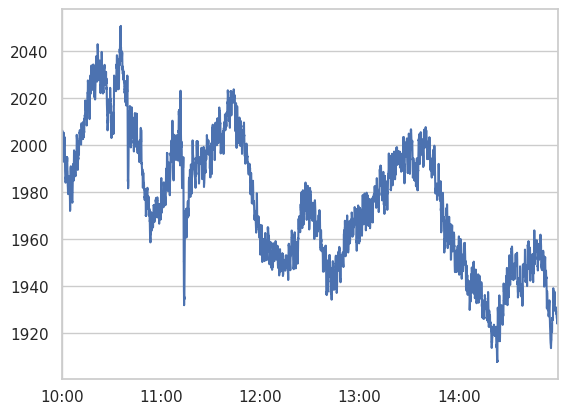

In [43]:
df1["GTA1.DBinPU.Qtg"].plot()

Модель с вниманием

In [ ]:
seq2seq_att.eval()



In [ ]:
seq2seq_att.eval()

with torch.no_grad():
  r_0_79_att, hs_0_79_att = seq2seq_att(encoder_inputs_0, decoder_inputs_79, first_step_79)

In [ ]:
seq2seq_att.eval()

with torch.no_grad():
  r_79_79_att, hs_79_79_att = seq2seq_att(encoder_inputs_79, decoder_inputs_79, first_step_79)

In [ ]:
seq2seq_att.eval()

with torch.no_grad():
  r_0_79_att_sint, hs_0_79_att_sint = seq2seq_att(encoder_inputs_0, decoder_inputs_79_sint, first_step_79)

In [ ]:
seq2seq_att.eval()

with torch.no_grad():
  r_79_79_att_sint, hs_79_79_att_sint = seq2seq_att(encoder_inputs_79, decoder_inputs_79_sint, first_step_79)

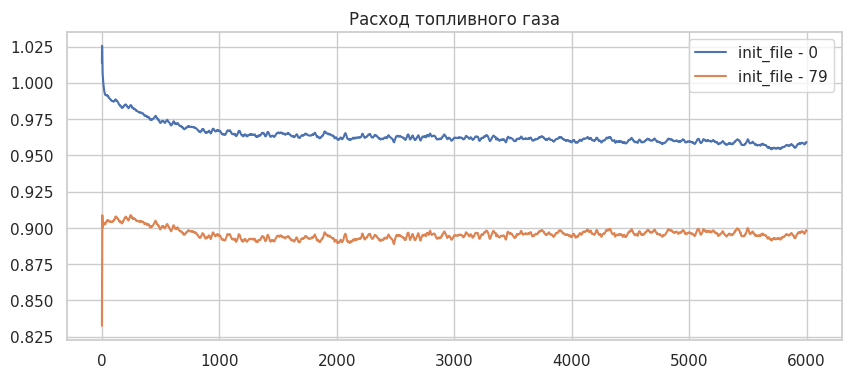

In [ ]:
fig = plt.figure(figsize=(10,4))

plt.plot(r_0_79_att[:,output_data.index('DBinPU.Qtg')], label="init_file - 0");
plt.plot(r_79_79_att[:,output_data.index('DBinPU.Qtg')], label="init_file - 79");
plt.legend();
plt.title(kks_dict['DBinPU.Qtg'])

fig.savefig('fig1.png', dpi=100, bbox_inches='tight');

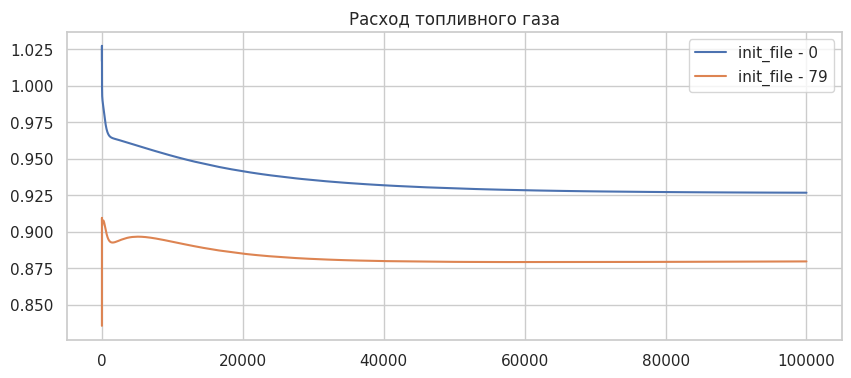

In [ ]:
fig = plt.figure(figsize=(10,4))

plt.plot(r_0_79_att_sint[:,output_data.index('DBinPU.Qtg')], label="init_file - 0");
plt.plot(r_79_79_att_sint[:,output_data.index('DBinPU.Qtg')], label="init_file - 79");
plt.legend();
plt.title(kks_dict['DBinPU.Qtg'])

fig.savefig('fig2.png', dpi=100, bbox_inches='tight');

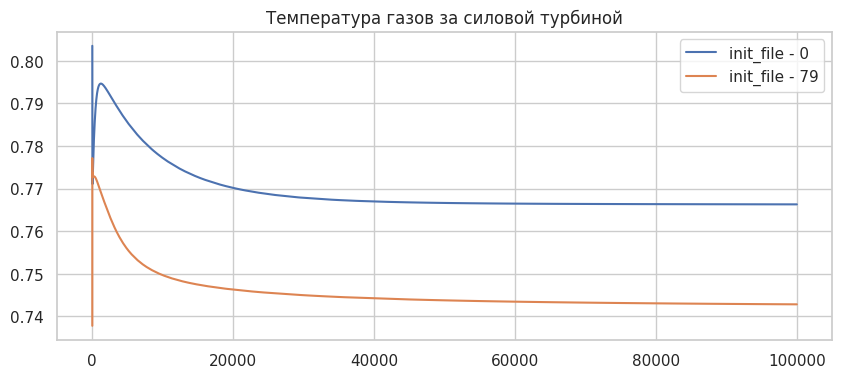

In [ ]:
fig = plt.figure(figsize=(10,4))

plt.plot(r_0_79_att_sint[:,output_data.index('DBinPU.Tt')], label="init_file - 0");
plt.plot(r_79_79_att_sint[:,output_data.index('DBinPU.Tt')], label="init_file - 79");
plt.legend();
plt.title(kks_dict['DBinPU.Tt'])

fig.savefig('fig3.png', dpi=100, bbox_inches='tight');

In [ ]:
# output_data = [
#     # 'GTA1.DBinPU.P', # активная мощность генератора, МВт
#     'GTA1.DBinPU.Aldi', # УП дозатора топлива, град
#     'GTA1.DBinPU.ntk', # частота вращения ротора турбокомпрессора, об/мин
#     # 'GTA1.DBinPU.nst', # частота вращения ротора силовой турбины, об/мин
#     'GTA1.DBinPU.Ies', # выходной ток в цепи электростартера, А
#     'GTA1.DBinPU.Alvna', # положение ВНА, град
#     'GTA1.DBinPU.Qtg', # расход топливного газа, м3/час
#     'GTA1.DBinPU.Pk', # давление за компрессором, МПа
#     'GTA1.DBinPU.Tvh1', # температура воздуха перед ГТД, С
#     'GTA1.DBinPU.Pvh', # давление воздуха перед ГТД, кПа
#     'GTA1.DBinPU.Tk', # температура воздуха за компрессором, С
#     'GTA1.DBinPU.Tt', # температура газов за силовой турбиной, С
#     'GTA1.DBinPU.Pvyhlg', # давление газов за силовой турбиной, кПа
# ]

Модель LSTM

In [ ]:
lstm_model.eval()

with torch.no_grad():
  r_0_79_lstm, hs_0_79_lstm = lstm_model(encoder_inputs_0, decoder_inputs_79)

In [ ]:
lstm_model.eval()

with torch.no_grad():
  r_79_79_lstm, hs_79_79_lstm = lstm_model(encoder_inputs_79, decoder_inputs_79)

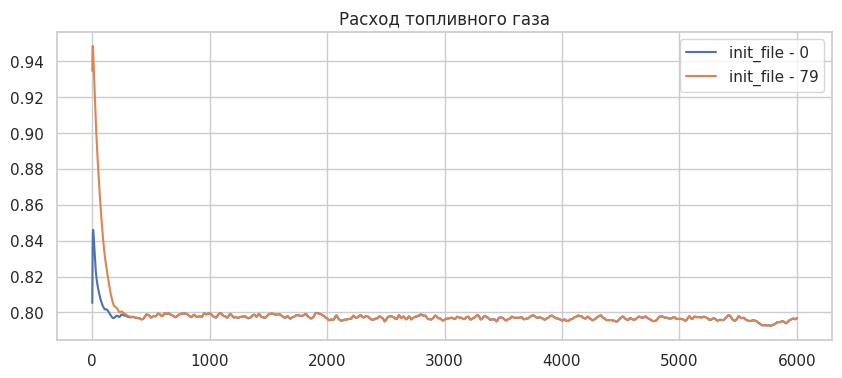

In [ ]:
fig = plt.figure(figsize=(10,4))

plt.plot(r_0_79_lstm[:,output_data.index('DBinPU.Qtg')], label="init_file - 0");
plt.plot(r_79_79_lstm[:,output_data.index('DBinPU.Qtg')], label="init_file - 79");
plt.legend();
plt.title(kks_dict['DBinPU.Qtg'])

fig.savefig('fig4.png', dpi=100, bbox_inches='tight');

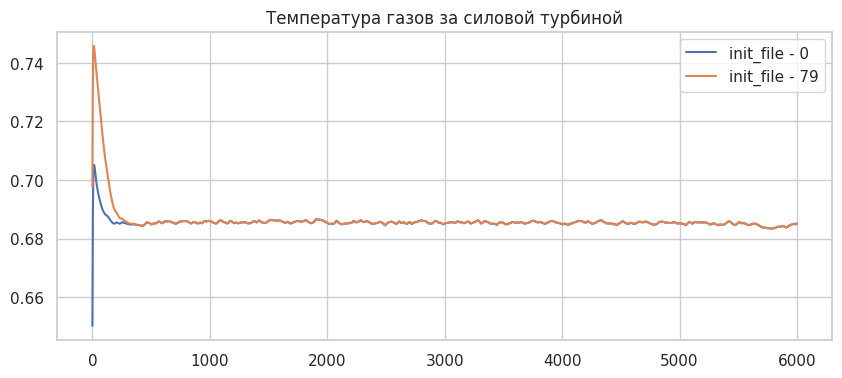

In [ ]:
fig = plt.figure(figsize=(10,4))

plt.plot(r_0_79_lstm[:,output_data.index('DBinPU.Tt')], label="init_file - 0");
plt.plot(r_79_79_lstm[:,output_data.index('DBinPU.Tt')], label="init_file - 79");
plt.legend();
plt.title(kks_dict['DBinPU.Tt'])

fig.savefig('fig4.png', dpi=100, bbox_inches='tight');

Модель Seq2Seq

In [ ]:
seq2seq.eval()

with torch.no_grad():
  r_0_79_seq2seq, hs_0_79_seq2seq = seq2seq(encoder_inputs_0, decoder_inputs_79, first_step_79)

In [ ]:
seq2seq.eval()

with torch.no_grad():
  r_79_79_seq2seq, hs_79_79_seq2seq = seq2seq(encoder_inputs_79, decoder_inputs_79, first_step_79)

In [ ]:
seq2seq.eval()

with torch.no_grad():
  r_0_79_seq2seq_sint, hs_0_79_seq2seq_sint = seq2seq(encoder_inputs_0, decoder_inputs_79_sint, first_step_79)

In [ ]:
seq2seq.eval()

with torch.no_grad():
  r_79_79_seq2seq_sint, hs_79_79_seq2seq_sint = seq2seq(encoder_inputs_79, decoder_inputs_79_sint, first_step_79)

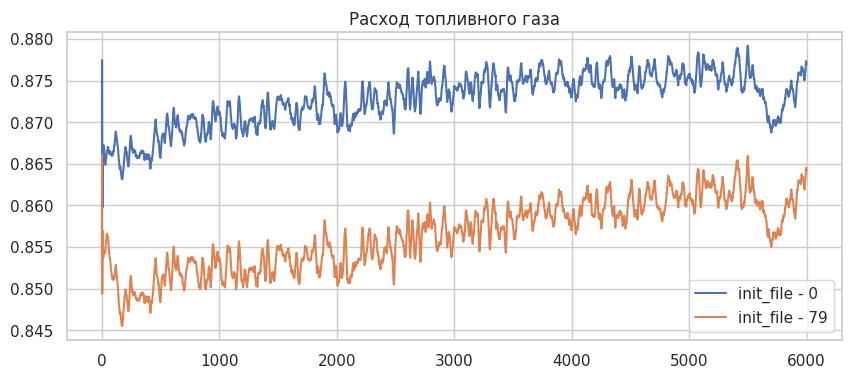

In [ ]:
fig = plt.figure(figsize=(10,4))

plt.plot(r_0_79_seq2seq[:,output_data.index('DBinPU.Qtg')], label="init_file - 0");
plt.plot(r_79_79_seq2seq[:,output_data.index('DBinPU.Qtg')], label="init_file - 79");
plt.legend();
plt.title(kks_dict['DBinPU.Qtg'])

fig.savefig('fig5.png', dpi=100, bbox_inches='tight');

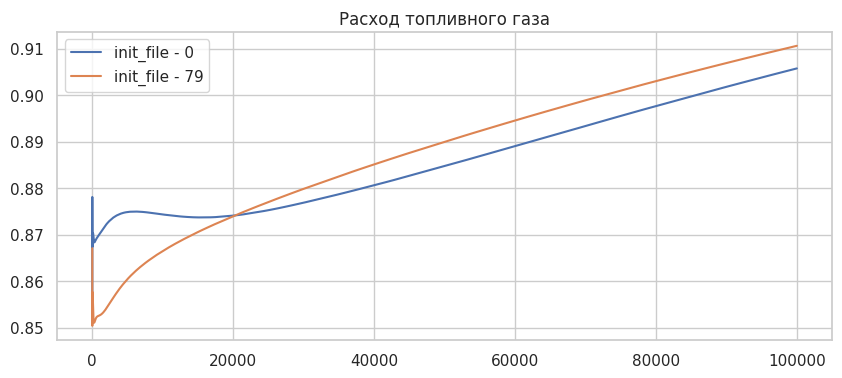

In [ ]:
fig = plt.figure(figsize=(10,4))

plt.plot(r_0_79_seq2seq_sint[:,output_data.index('DBinPU.Qtg')], label="init_file - 0");
plt.plot(r_79_79_seq2seq_sint[:,output_data.index('DBinPU.Qtg')], label="init_file - 79");
plt.legend();
plt.title(kks_dict['DBinPU.Qtg'])

fig.savefig('fig6.png', dpi=100, bbox_inches='tight');

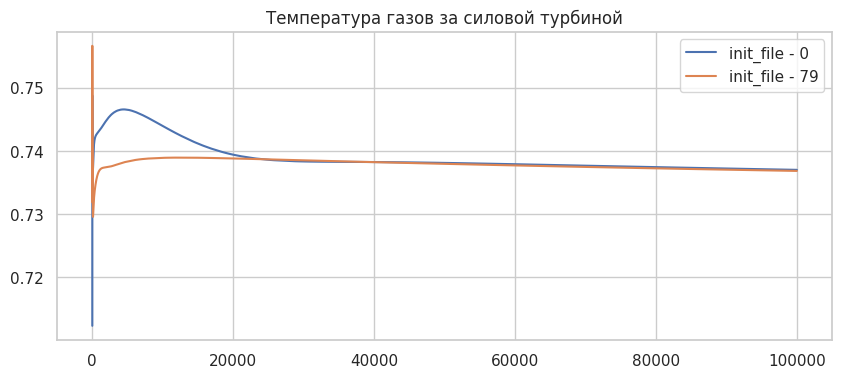

In [ ]:
fig = plt.figure(figsize=(10,4))

plt.plot(r_0_79_seq2seq_sint[:,output_data.index('DBinPU.Tt')], label="init_file - 0");
plt.plot(r_79_79_seq2seq_sint[:,output_data.index('DBinPU.Tt')], label="init_file - 79");
plt.legend();
plt.title(kks_dict['DBinPU.Tt'])

fig.savefig('fig7.png', dpi=100, bbox_inches='tight');

Сравним предсказания разных моделей ради интереса

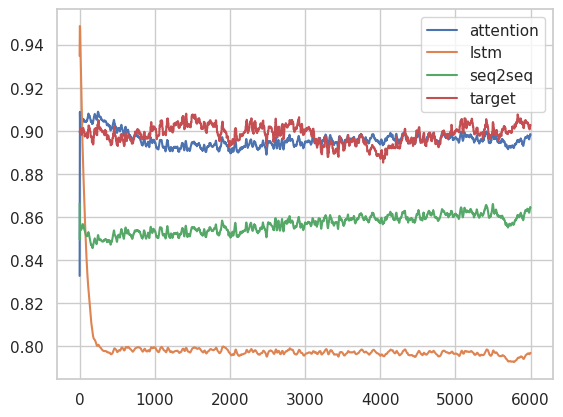

In [ ]:
plt.plot(r_79_79_att[:,output_data.index('GTA1.DBinPU.Qtg')], label="attention");
plt.plot(r_79_79_lstm[:,output_data.index('GTA1.DBinPU.Qtg')], label="lstm");
plt.plot(r_79_79_seq2seq[:,output_data.index('GTA1.DBinPU.Qtg')], label="seq2seq");
plt.plot(target[:, output_data.index('GTA1.DBinPU.Qtg')], label="target");
plt.legend();

In [ ]:
seq2seq

Seq2Seq(
  (encoder): Encoder(
    (gru): GRU(19, 1024, num_layers=2, batch_first=True)
  )
  (decoder): DecoderVanilla(
    (gru): GRU(19, 1024, num_layers=2, batch_first=True)
    (out): Linear(in_features=1024, out_features=11, bias=True)
  )
)

In [ ]:
seq2seq_att

Seq2Seq(
  (encoder): Encoder(
    (gru): GRU(19, 1024, num_layers=2, batch_first=True)
  )
  (decoder): DecoderVanilla(
    (gru): GRU(19, 1024, num_layers=2, batch_first=True)
    (out): Linear(in_features=1024, out_features=11, bias=True)
  )
)

In [ ]:
start_encoder_seq = 2000
end_encoder_seq = 2000 + 60
file = parquetFileList[0]

df = pd.read_parquet(file)

input_values = df[input_data]
output_values = df[output_data]

input_scaled = scaler_input.transform(input_values)
output_scaled = scaler_output.transform(output_values)

input_scaled = torch.tensor(input_scaled, dtype=torch.float32)
output_scaled = torch.tensor(output_scaled, dtype=torch.float32)

encoder_inputs = torch.cat((
    input_scaled[start_encoder_seq:end_encoder_seq, :], output_scaled[start_encoder_seq:end_encoder_seq, :]), 1)

encoder_inputs_0_2 = encoder_inputs[None,:,:]

## Тестирование на новых данных

In [ ]:
testParquetFileList[-3]

'/content/drive/MyDrive/RNN-models-data/test_data/gta2_2024_10_04_05_00.gzip'

In [ ]:
df = pd.read_parquet(testParquetFileList[-3])
df.columns = list(map(lambda col: col[5:], df.columns))
df = df.reset_index()

In [ ]:
df.columns

Index(['index', 'DBinPU.Aldi', 'DBinPU.Alvna', 'DBinPU.Alzzo', 'DBinPU.Bo',
       'DBinPU.fi', 'DBinPU.nst', 'DBinPU.ntk', 'DBinPU.P', 'DBinPU.Pk',
       'DBinPU.Ptgpd', 'DBinPU.Pvh', 'DBinPU.Pvyhlg', 'DBinPU.Qtg',
       'DBinPU.Tk', 'DBinPU.Tn', 'DBinPU.Tt', 'DBinPU.Ttgvh', 'DBinPU.Tvh1',
       'DBinPU.Ies'],
      dtype='object')

<Axes: >

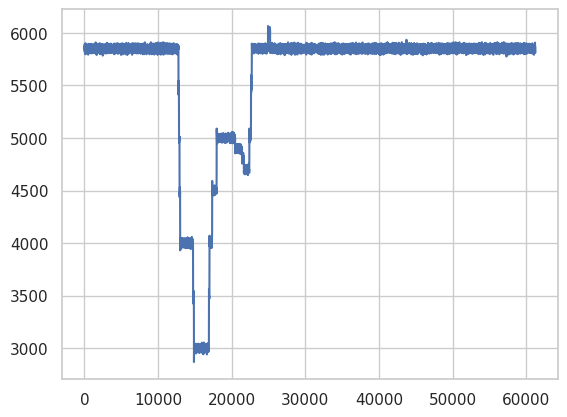

In [ ]:
df['DBinPU.P'].plot()

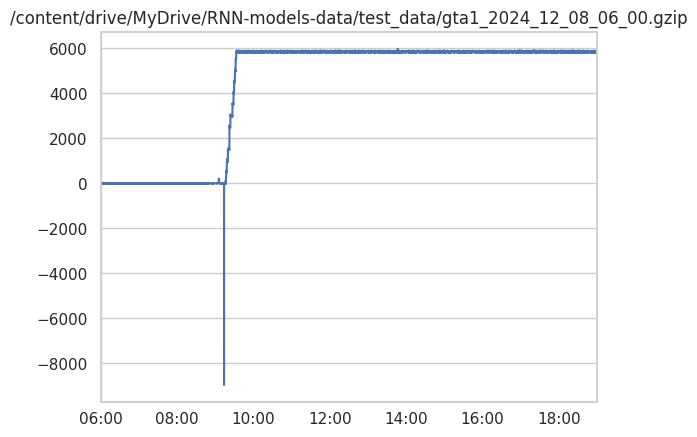

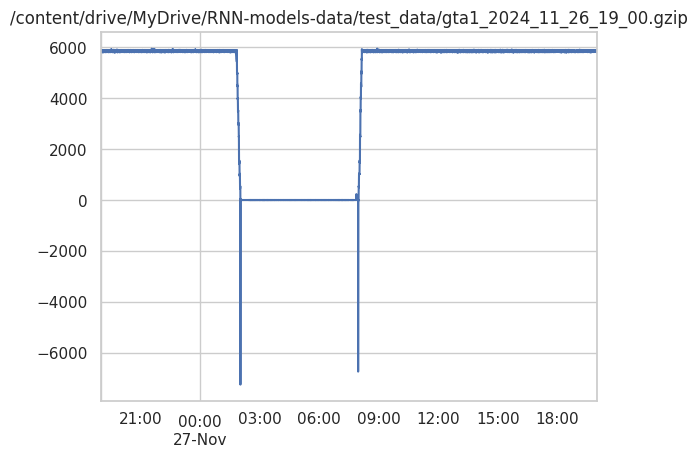

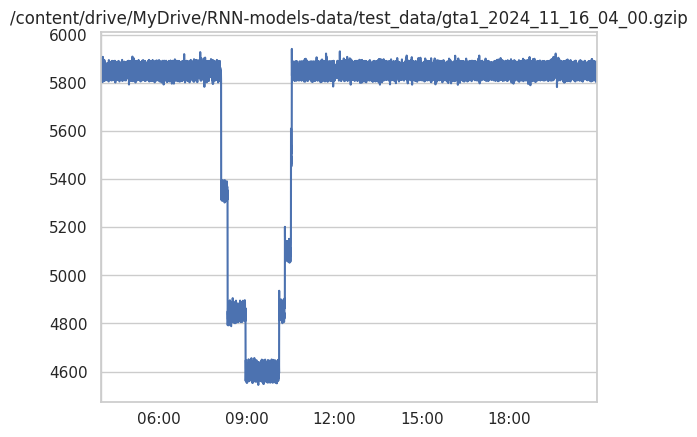

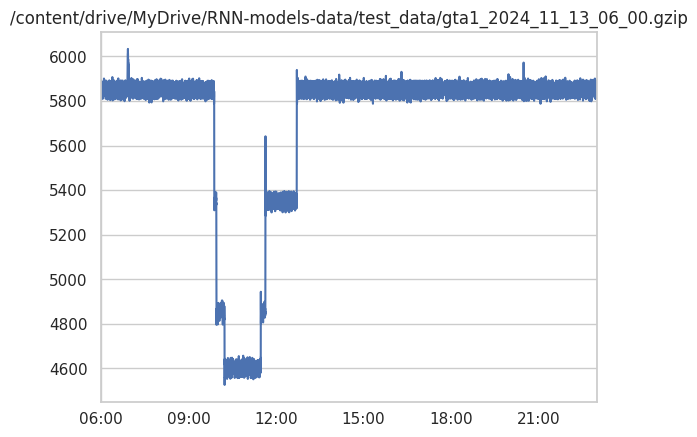

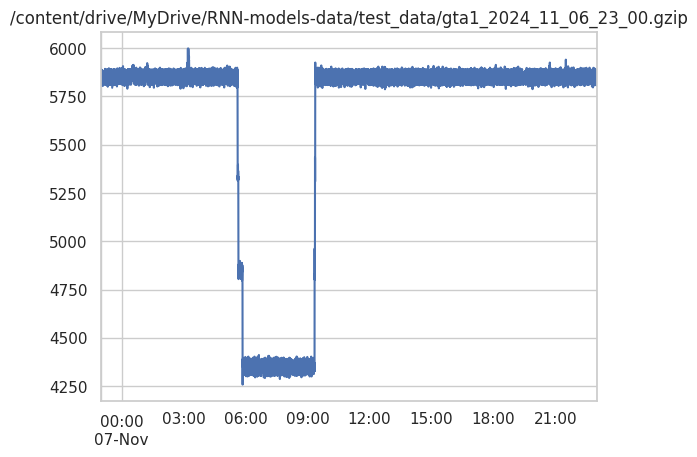

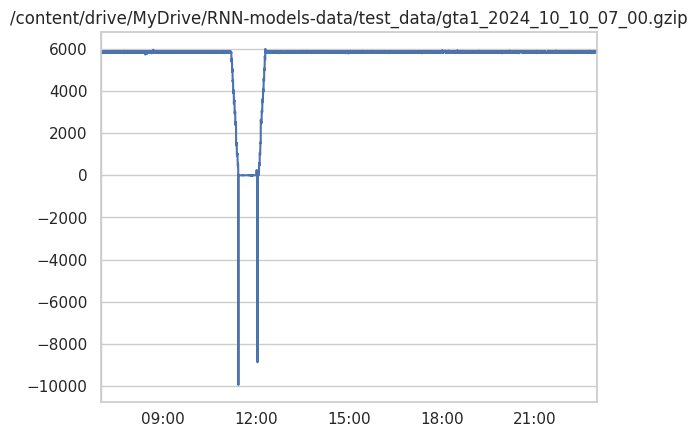

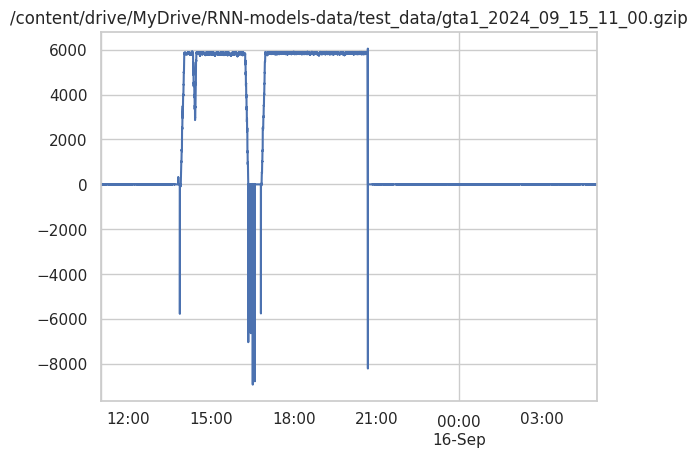

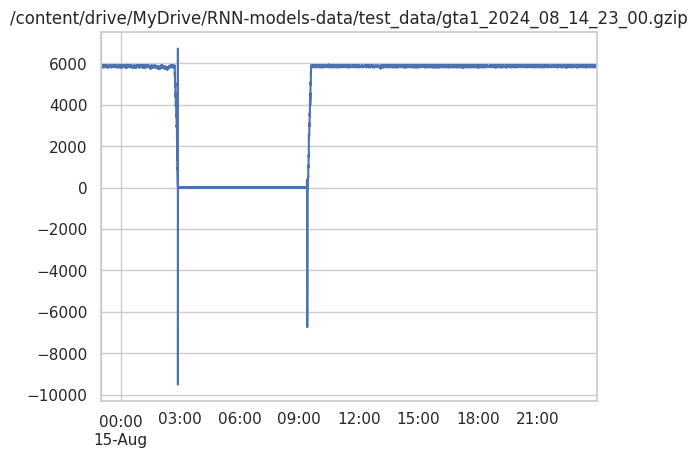

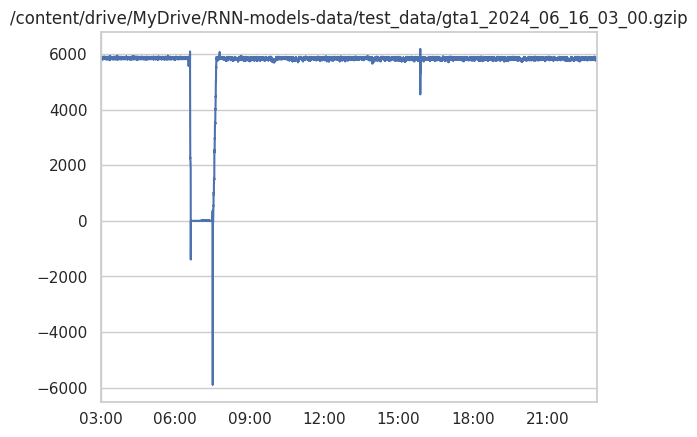

In [ ]:
for file in testParquetFileList:
  if "gta1" in file:
    df= pd.read_parquet(file)
    df.columns = list(map(lambda col: col[5:], df.columns))
    df['DBinPU.P'].plot();
    plt.title(file)
    plt.show()

In [ ]:
test_file = testParquetFileList[-3]

df, loss = predict_by_file(test_file, seq2seq, 60, 50000, 50000, drop_low_rpm=False)
# df[list(map(lambda s: s + "_predict", output_data))] = scaler_output.inverse_transform(df[list(map(lambda s: s + "_predict", output_data))].values)
# df[list(map(lambda s: s + "_target", output_data))] = scaler_output.inverse_transform(df[list(map(lambda s: s + "_target", output_data))].values)

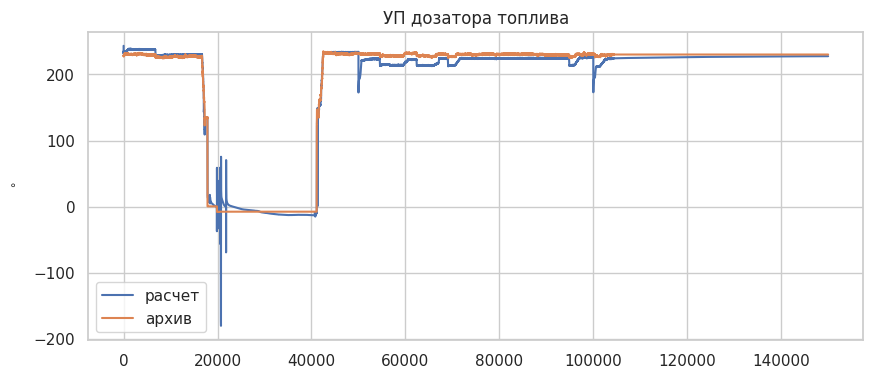

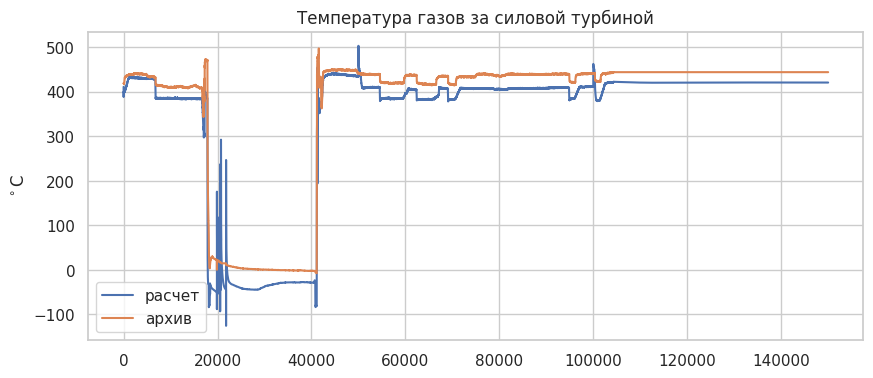

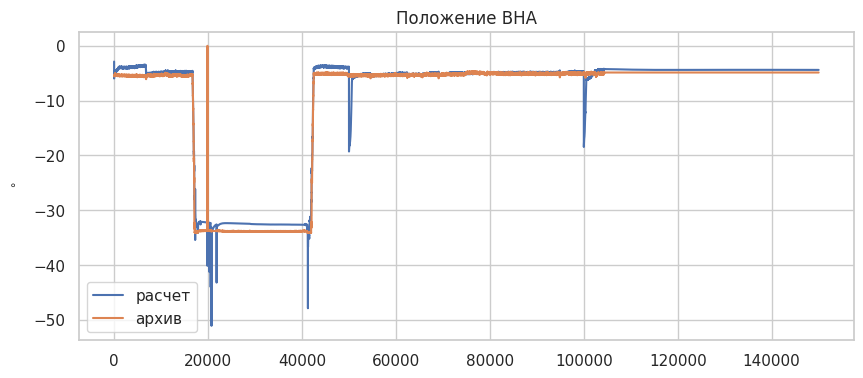

In [ ]:
# input_df = pd.read_parquet(test_file)[input_data].iloc[60:1000+60,:]
# input_df = input_df.reset_index()

fig = plt.figure(figsize=(10,4))
df['DBinPU.Aldi_predict'].plot(label="расчет");
df['DBinPU.Aldi_target'].plot(label="архив");
plt.legend();
plt.ylabel(kks_units['DBinPU.Aldi']);
plt.title(kks_dict['DBinPU.Aldi']);
plt.show();
# fig.savefig('fig1_seq2seq.png', dpi=100, bbox_inches='tight');

fig = plt.figure(figsize=(10,4))
df['DBinPU.Tt_predict'].plot(label="расчет");
df['DBinPU.Tt_target'].plot(label="архив");
plt.legend();
plt.ylabel(kks_units['DBinPU.Tt']);
plt.title(kks_dict['DBinPU.Tt']);
plt.show();
# fig.savefig('fig2_seq2seq.png', dpi=100, bbox_inches='tight');

fig = plt.figure(figsize=(10,4))
df['DBinPU.Alvna_predict'].plot(label="расчет");
df['DBinPU.Alvna_target'].plot(label="архив");
plt.legend();
plt.ylabel(kks_units['DBinPU.Alvna']);
plt.title(kks_dict['DBinPU.Alvna']);
plt.show();
# fig.savefig('fig2_att.png', dpi=100, bbox_inches='tight');

'/content/drive/MyDrive/RNN-models-data/test_data/gta2_2024_12_08_21_00.gzip'

In [ ]:
def plot_model_result(file,
                      model, ENCODER_LENGTH=ENCODER_LENGTH, HORIZON=HORIZON, STEP=STEP, drop_low_rpm=False, error=True):

  df, loss = predict_by_file(file, model, ENCODER_LENGTH, HORIZON, STEP, drop_low_rpm)
  df_error = pd.DataFrame(df[map(lambda param: param+"_target", output_data)].values - df[map(lambda param: param+"_predict", output_data)].values,
             columns=output_data)
  df[list(map(lambda s: s + "_predict", output_data))] = scaler_output.inverse_transform(df[list(map(lambda s: s + "_predict", output_data))].values)
  df[list(map(lambda s: s + "_target", output_data))] = scaler_output.inverse_transform(df[list(map(lambda s: s + "_target", output_data))].values)

  params = output_data

  fig, axs = plt.subplots(6, 2, figsize=(20,20))
  plt.subplots_adjust(hspace=0.3, wspace=0.15)

  axs = np.array(axs)

  for idx, ax in enumerate(axs.reshape(-1)):
    if idx > (len(params) - 1):
      df_error.abs().plot(ax=ax);
      ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=False, shadow=False, ncol=4)
      ax.set_title("невязка")
      break
    ax.plot(df['index'], df[params[idx]+"_predict"], label="расчет")
    ax.plot(df['index'], df[params[idx]+"_target"], label="целевое значение")
    # if error: ax.plot(df['index'], abs(df[params[idx]+"_target"] - df[params[idx]+"_predict"]), label="error")
    ax.set_ylabel(kks_units[params[idx]])
    ax.set_title(kks_dict[params[idx]])
    ax.legend()

  fig.savefig('fig.png', dpi=100, bbox_inches='tight');
  plt.show()


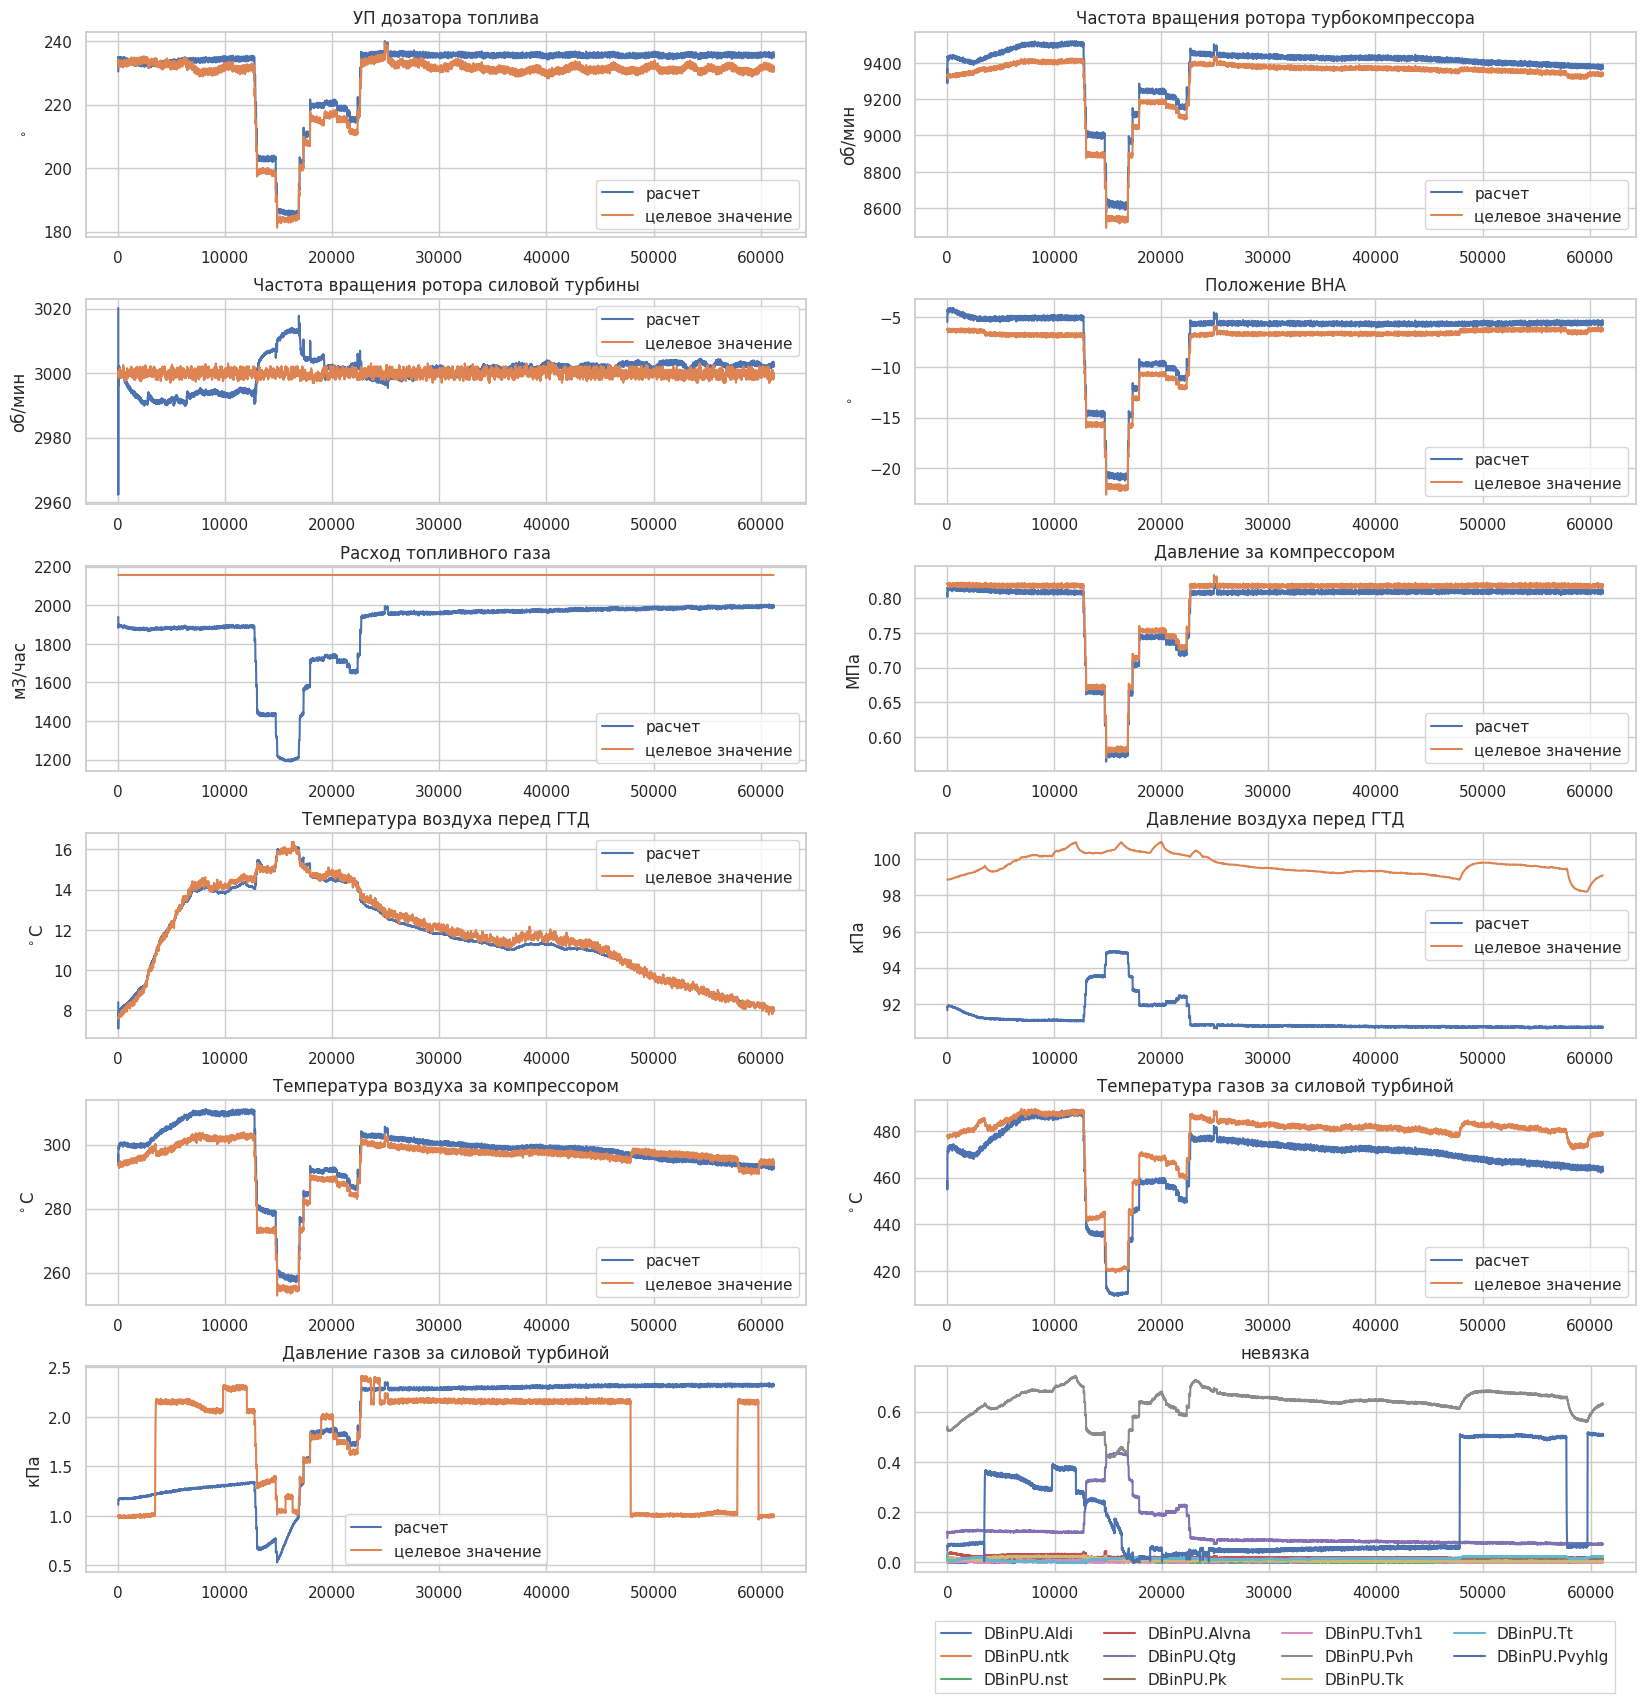

In [ ]:
plot_model_result(testParquetFileList[-3], seq2seq, ENCODER_LENGTH=60, HORIZON=500000, STEP=500000, drop_low_rpm=False)

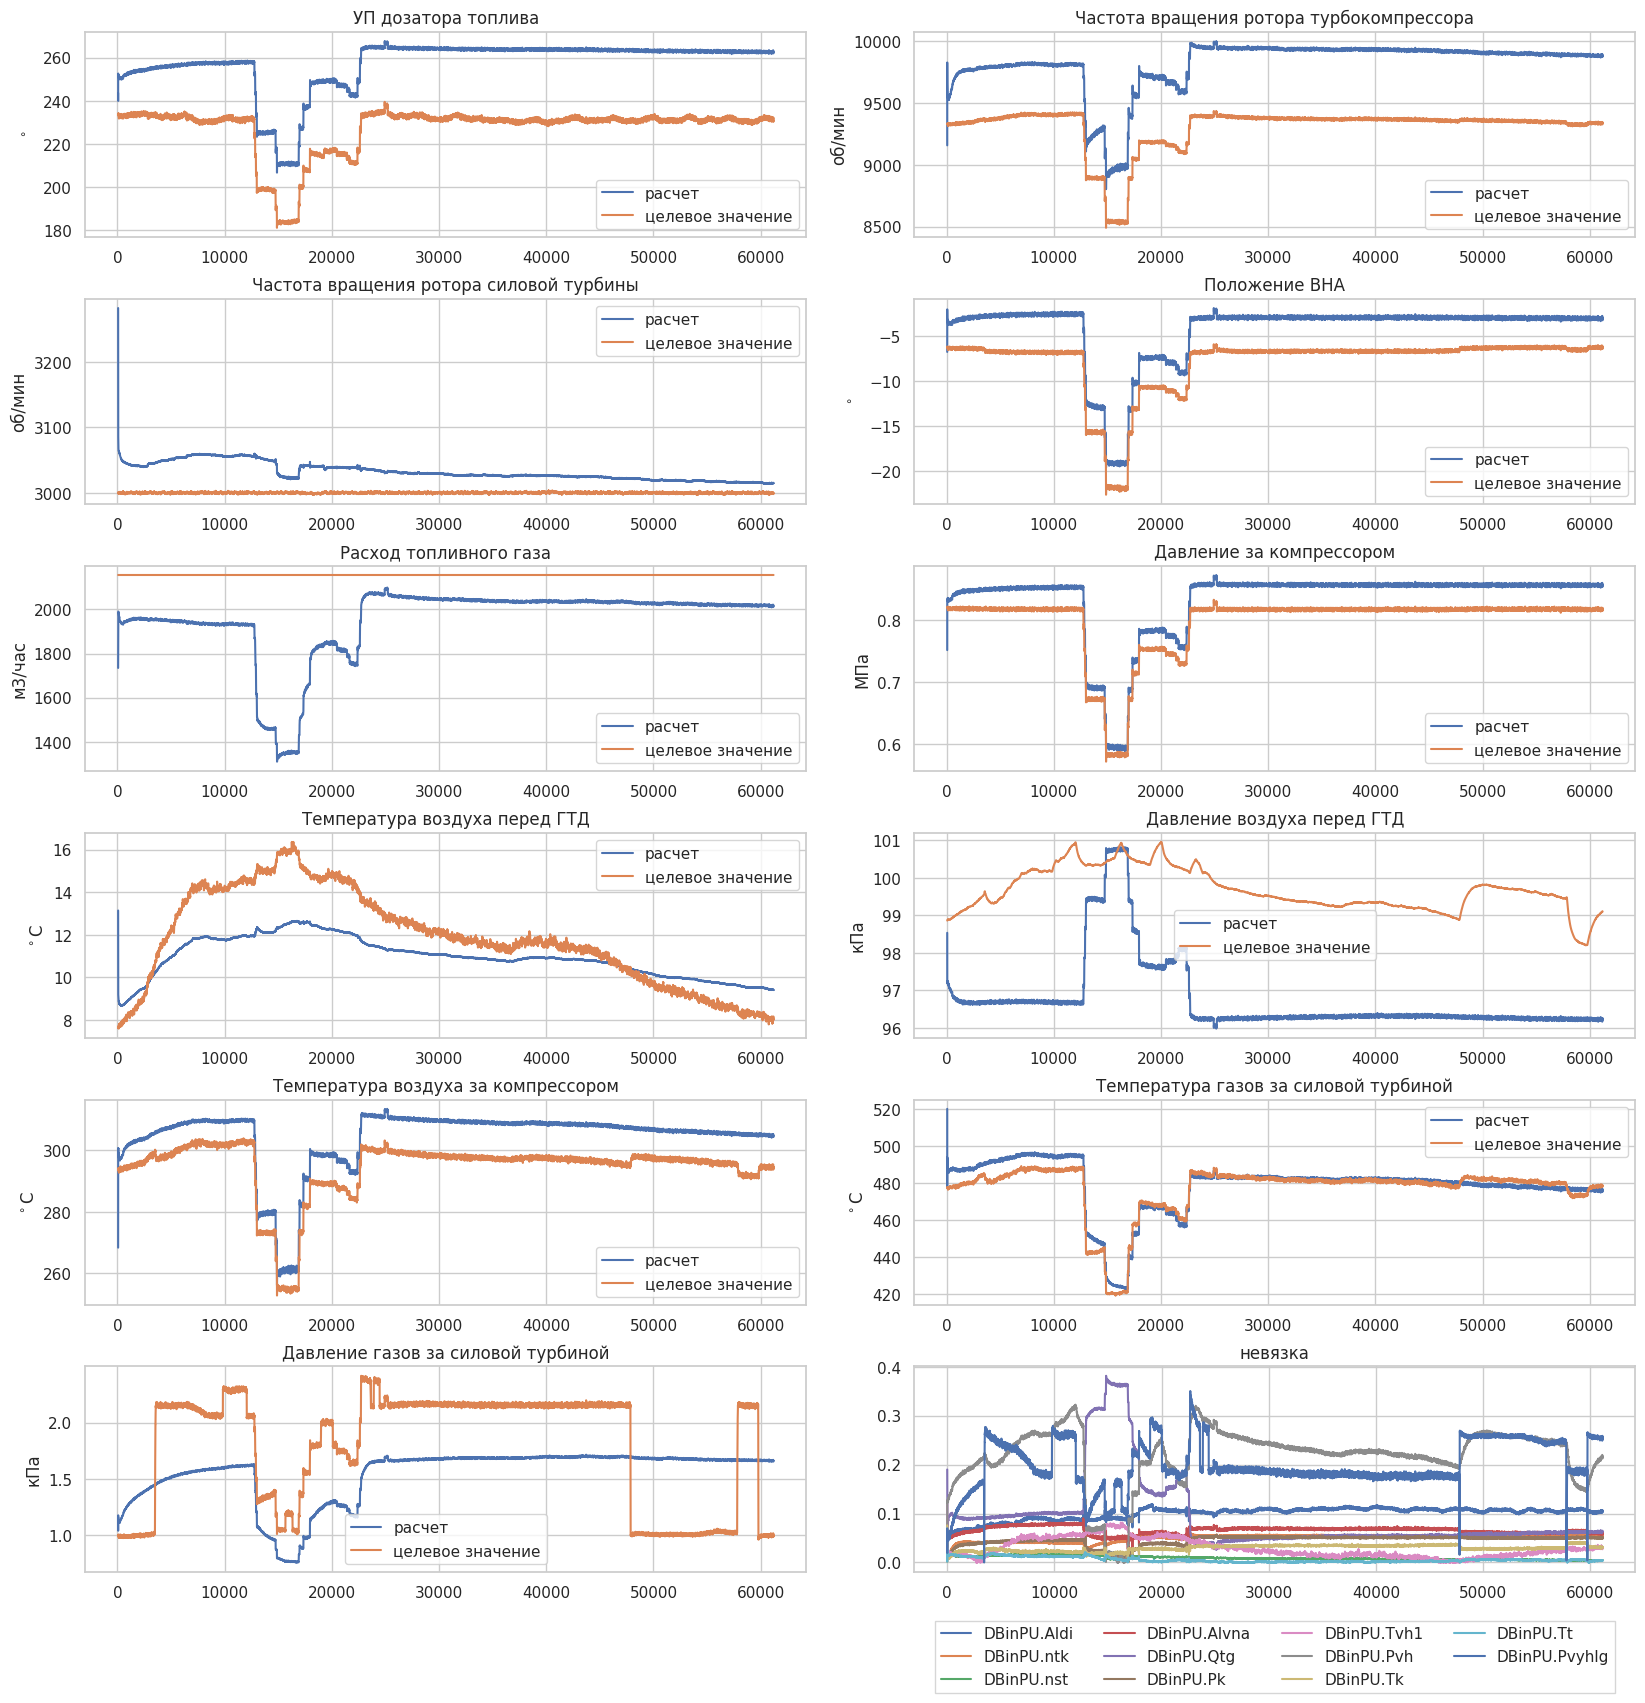

In [ ]:
plot_model_result(testParquetFileList[-3], seq2seq_att, ENCODER_LENGTH=60, HORIZON=500000, STEP=500000, drop_low_rpm=False)

In [ ]:
testParquetFileList[3]

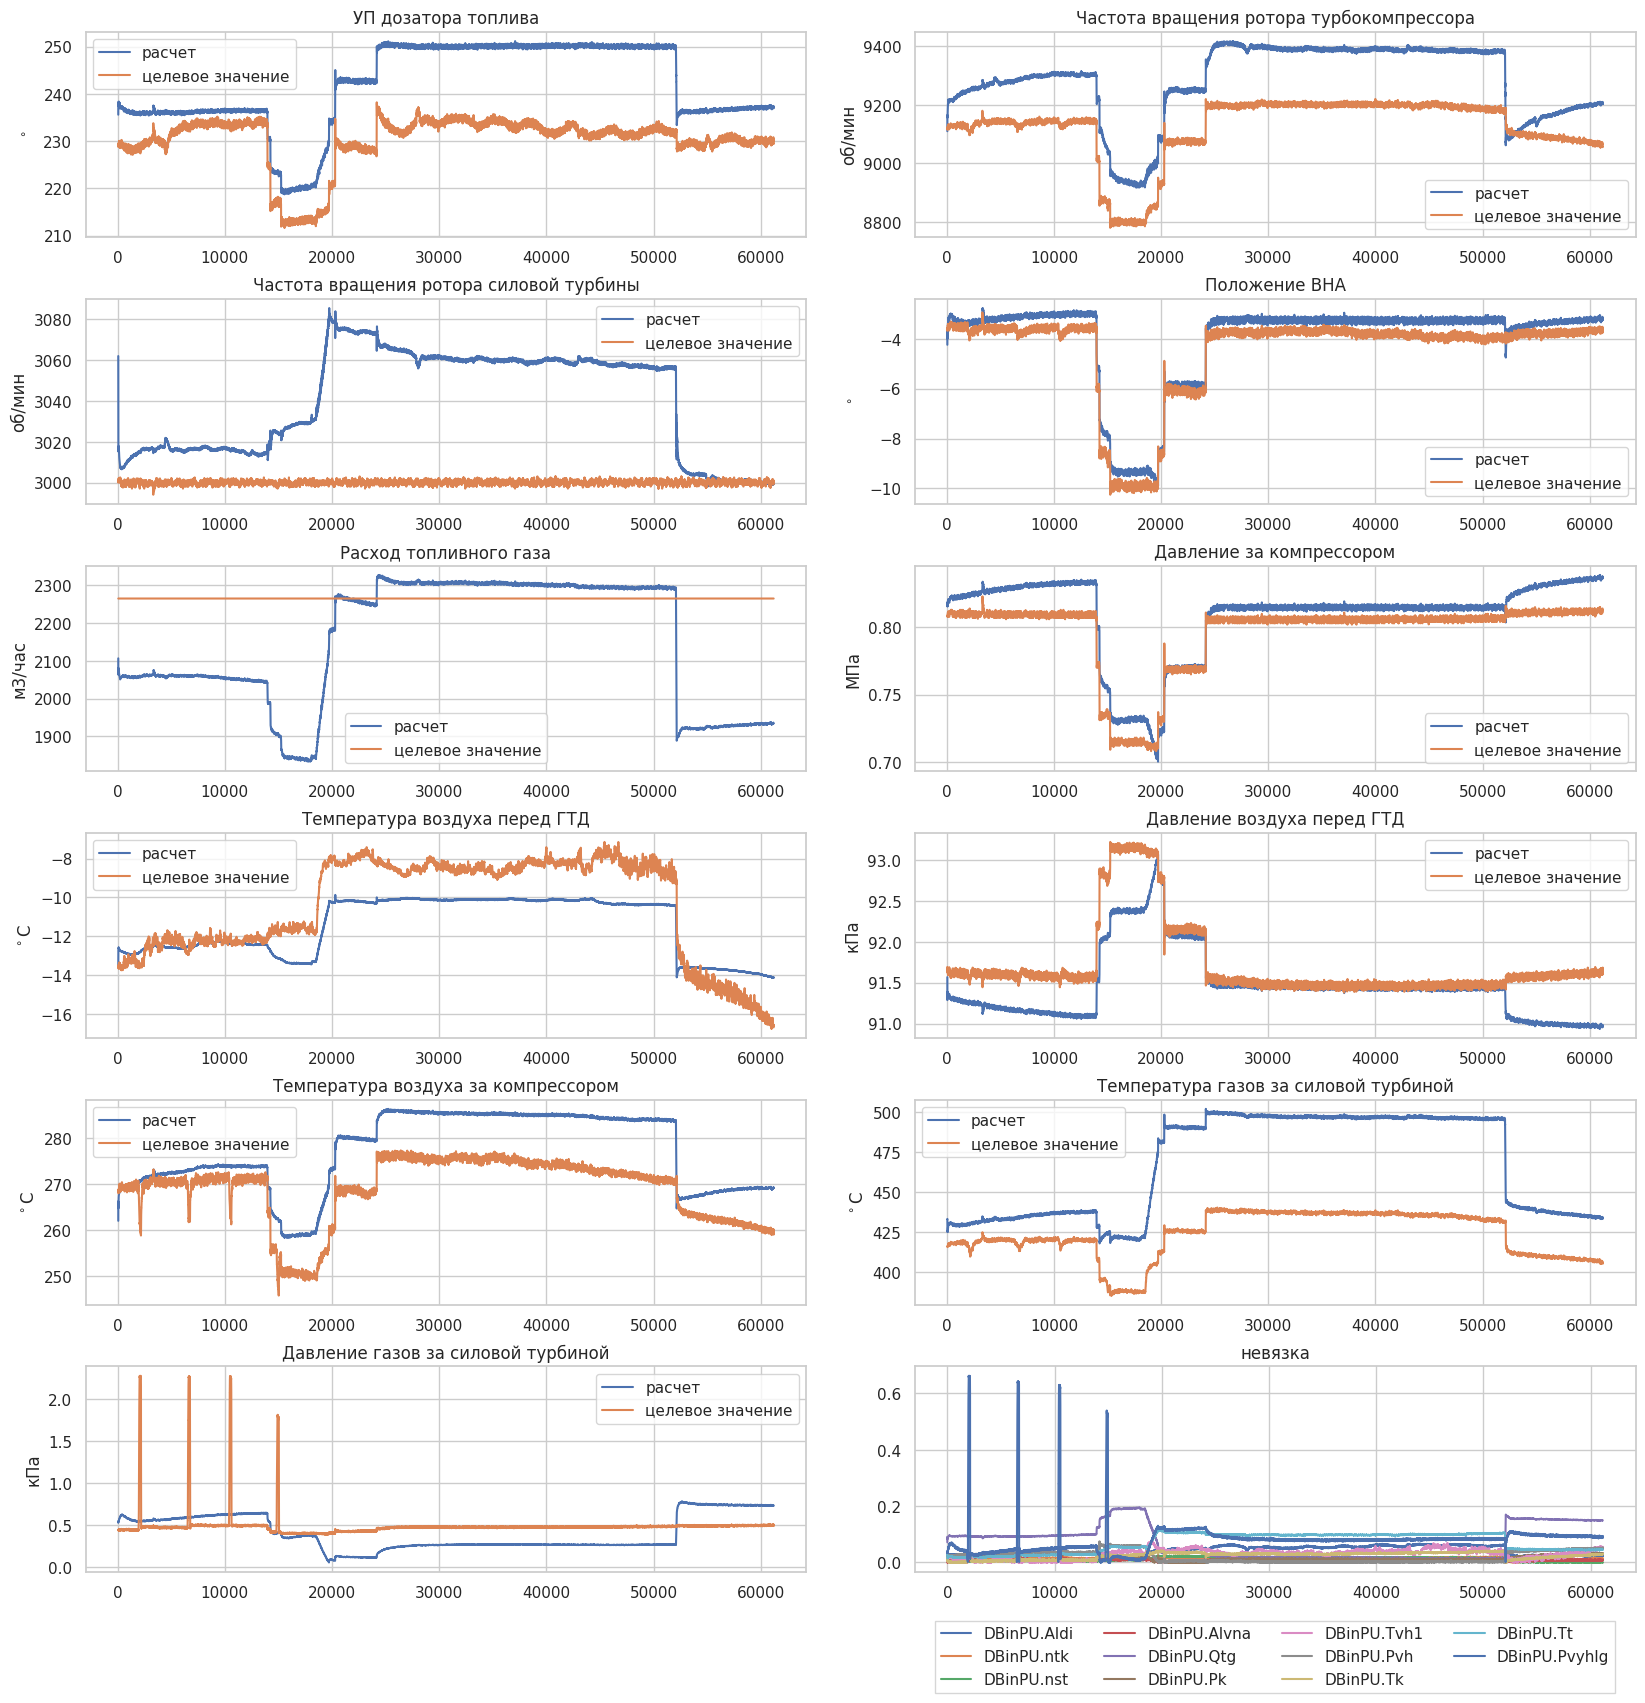

In [ ]:
plot_model_result(testParquetFileList[3], seq2seq_att, ENCODER_LENGTH=60, HORIZON=500000, STEP=500000, drop_low_rpm=False)